In [2]:
import pandas as pd

# Load raw data
df = pd.read_csv("communities+and+crime/communities.data", header=None, na_values=["?"])

# Load column names from .names file
with open("communities+and+crime/communities.names") as f:
    lines = f.readlines()
column_names = [line.split()[1] for line in lines if line.startswith("@attribute")]
df.columns = column_names[:df.shape[1]]

# Drop the first 5 columns
df = df.iloc[:, 5:]

# Keep only percentage-based columns + target
df = df[[col for col in df.columns if ('pct' in col.lower()) or col == 'ViolentCrimesPerPop']]

# Save the cleaned dataset
df.to_csv("communities_percentages_cleaned.csv", index=False)

print(f"✅ Cleaned dataset saved. Shape: {df.shape}")


✅ Cleaned dataset saved. Shape: (1994, 74)


In [3]:
import pandas as pd

# Read the raw data as strings
df = pd.read_csv("communities+and+crime/communities.data", header=None, na_values='?')

print(f"Shape: {df.shape}\n")
print(df[:5])  # Preview the first 5 rows #violentCrimeRate

Shape: (1994, 128)

   0     1        2                    3    4     5     6     7     8     9    \
0    8   NaN      NaN         Lakewoodcity    1  0.19  0.33  0.02  0.90  0.12   
1   53   NaN      NaN          Tukwilacity    1  0.00  0.16  0.12  0.74  0.45   
2   24   NaN      NaN         Aberdeentown    1  0.00  0.42  0.49  0.56  0.17   
3   34   5.0  81440.0  Willingborotownship    1  0.04  0.77  1.00  0.08  0.12   
4   42  95.0   6096.0    Bethlehemtownship    1  0.01  0.55  0.02  0.95  0.09   

   ...   118   119   120   121   122  123  124   125   126   127  
0  ...  0.12  0.26  0.20  0.06  0.04  0.9  0.5  0.32  0.14  0.20  
1  ...  0.02  0.12  0.45   NaN   NaN  NaN  NaN  0.00   NaN  0.67  
2  ...  0.01  0.21  0.02   NaN   NaN  NaN  NaN  0.00   NaN  0.43  
3  ...  0.02  0.39  0.28   NaN   NaN  NaN  NaN  0.00   NaN  0.12  
4  ...  0.04  0.09  0.02   NaN   NaN  NaN  NaN  0.00   NaN  0.03  

[5 rows x 128 columns]


In [4]:
import pandas as pd

# Load raw data
df_cleaned = pd.read_csv("communities+and+crime/communities.data", header=None, na_values=["?"])

# Step 1: Assign real column names
with open("communities+and+crime/communities.names") as f:
    lines = f.readlines()
column_names = [line.split()[1] for line in lines if line.startswith("@attribute")]
df_cleaned.columns = column_names[:df_cleaned.shape[1]]

# Step 2: Drop first 5 columns by name, preserving the target if it's among them
first_5_cols = df_cleaned.columns[:5].tolist()
if 'ViolentCrimesPerPop' in first_5_cols:
    first_5_cols.remove('ViolentCrimesPerPop')

df_final = df_cleaned.drop(columns=first_5_cols)

# Step 3: Drop columns with >50% missing values — EXCEPT the target
nan_threshold = 0.5 * len(df_final)
nan_cols = df_final.columns[df_final.isna().sum() > nan_threshold].tolist()
if 'ViolentCrimesPerPop' in nan_cols:
    nan_cols.remove('ViolentCrimesPerPop')

df_final = df_final.drop(columns=nan_cols)

# Step 4: Keep only percentage-based columns + target
percentage_cols = [col for col in df_final.columns if 'pct' in col.lower()]
if 'ViolentCrimesPerPop' in df_final.columns:
    percentage_cols.append('ViolentCrimesPerPop')

df_final = df_final[percentage_cols]

print(f"✅ Final shape with only percentage features and target: {df_final.shape}")
df_final.head()



✅ Final shape with only percentage features and target: (1994, 68)


racepctblack  racePctWhite  racePctAsian  racePctHisp  agePct12t21  \
0          0.02          0.90          0.12         0.17         0.34   
1          0.12          0.74          0.45         0.07         0.26   
2          0.49          0.56          0.17         0.04         0.39   
3          1.00          0.08          0.12         0.10         0.51   
4          0.02          0.95          0.09         0.05         0.38   

   agePct12t29  agePct16t24  agePct65up  pctUrban  pctWWage  ...  \
0         0.47         0.29        0.32       1.0      0.72  ...   
1         0.59         0.35        0.27       1.0      0.72  ...   
2         0.47         0.28        0.32       0.0      0.58  ...   
3         0.50         0.34        0.21       1.0      0.89  ...   
4         0.38         0.23        0.36       0.9      0.72  ...   

   MedOwnCostPctInc  MedOwnCostPctIncNoMtg  PctForeignBorn  PctBornSameState  \
0              0.46                   0.25            0.12              0.42   
1              0.32                   0.18            0.21              0.50   
2              0.39                   0.28            0.14              0.49   
3              0.51                   0.47            0.19              0.30   
4              0.51                   0.21            0.11              0.72   

   PctSameHouse85  PctSameCity85  PctSameState85  PctUsePubTrans  \
0            0.50           0.51            0.64            0.20   
1            0.34           0.60            0.52            0.45   
2            0.54           0.67            0.56            0.02   
3            0.73           0.64            0.65            0.28   
4            0.64           0.61            0.53            0.02   

   LemasPctOfficDrugUn  ViolentCrimesPerPop  
0                 0.32                 0.20  
1                 0.00                 0.67  
2                 0.00                 0.43  
3                 0.00                 0.12  
4                 0.00                 0.03  

[5 rows x 68 columns]

In [5]:
df_final = df_final.apply(pd.to_numeric, errors='coerce')

In [6]:
missing_cols = df_final.columns[df_final.isnull().any()]
print("Columns with missing values:")
print(missing_cols.tolist())

Columns with missing values:
[]


In [7]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Only use numeric columns
df_numeric = df_final.select_dtypes(include=[np.number])

for col in df_numeric.columns[df_numeric.isna().any()]:
    not_null = df_numeric[df_numeric[col].notnull()]
    is_null = df_numeric[df_numeric[col].isnull()]

    if len(not_null) < 50 or len(is_null) == 0:
        print(f"⛔ Skipping '{col}' due to insufficient data.")
        continue

    X_train = not_null.drop(columns=[col]).fillna(not_null.mean())
    y_train = not_null[col]
    X_pred = is_null.drop(columns=[col]).fillna(not_null.mean())

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_pred)

    df.loc[df_final[col].isnull(), col] = y_pred
    print(f"✅ Filled {len(y_pred)} missing values in '{col}' using Random Forest.")


In [8]:
missing = df_final.isnull().sum().sum()

if missing == 0:
    print("✅ No missing values remain in the dataset.")
else:
    print(f"⚠️ There are still {missing} missing values in the dataset.")

✅ No missing values remain in the dataset.


In [9]:
df_final.to_excel("communities+and+crime/kinda_cleaned.xlsx", index=False)

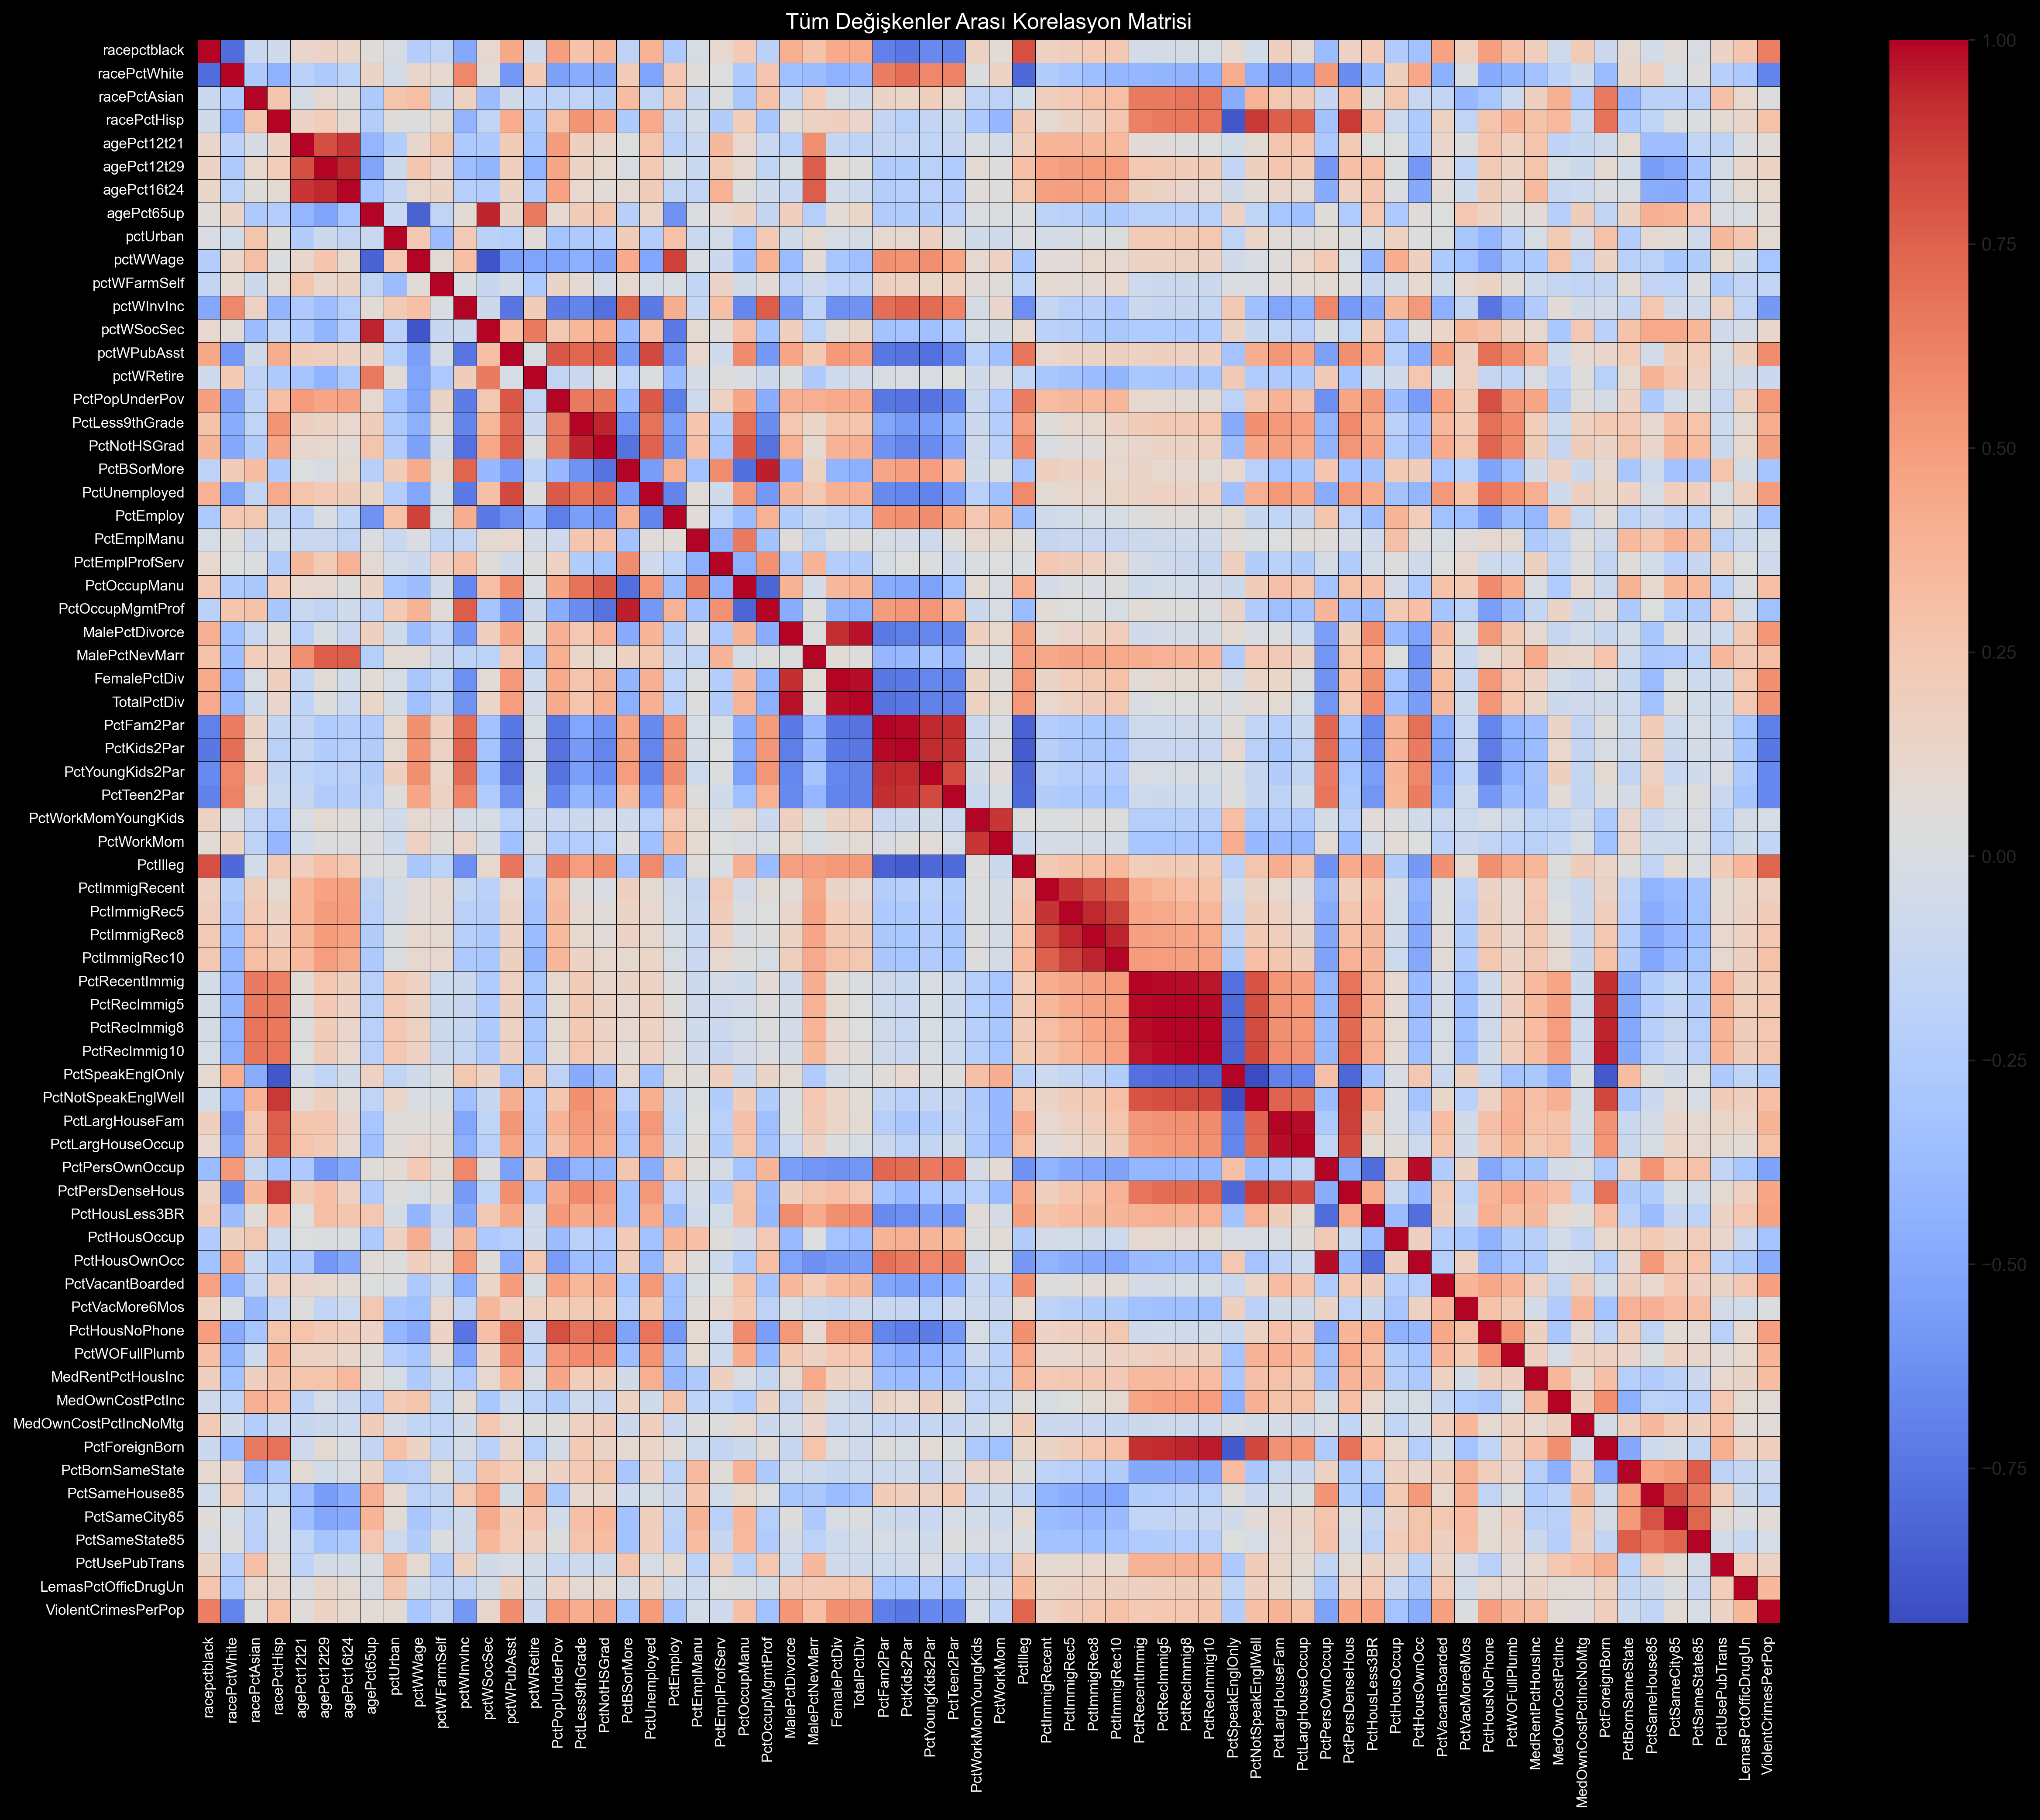

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Korelasyon matrisi
full_corr = df_final.corr(numeric_only=True)

# High-resolution figure with black background
fig, ax = plt.subplots(figsize=(18, 14), dpi=300, facecolor='black')

sns.heatmap(
    full_corr,
    cmap='coolwarm',
    cbar=True,
    ax=ax,
    linewidths=0.2,
    linecolor='black',
    square=True,
    xticklabels=True,
    yticklabels=True
)

# Siyah zemin ve beyaz yazılar
ax.set_facecolor('black')
ax.tick_params(colors='white', labelsize=8)
plt.title("Tüm Değişkenler Arası Korelasyon Matrisi", color='white')
# figures klasörünü oluştur
os.makedirs("figures", exist_ok=True)

plt.tight_layout()
plt.savefig("figures/correlation_matrix.png", facecolor=fig.get_facecolor())
plt.show()

# Excel çıktısı
full_corr.to_excel("communities+and+crime/correlation_rates.xlsx")


['racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'PctIlleg', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'PctHousNoPhone', 'PctWOFullPlumb', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCos

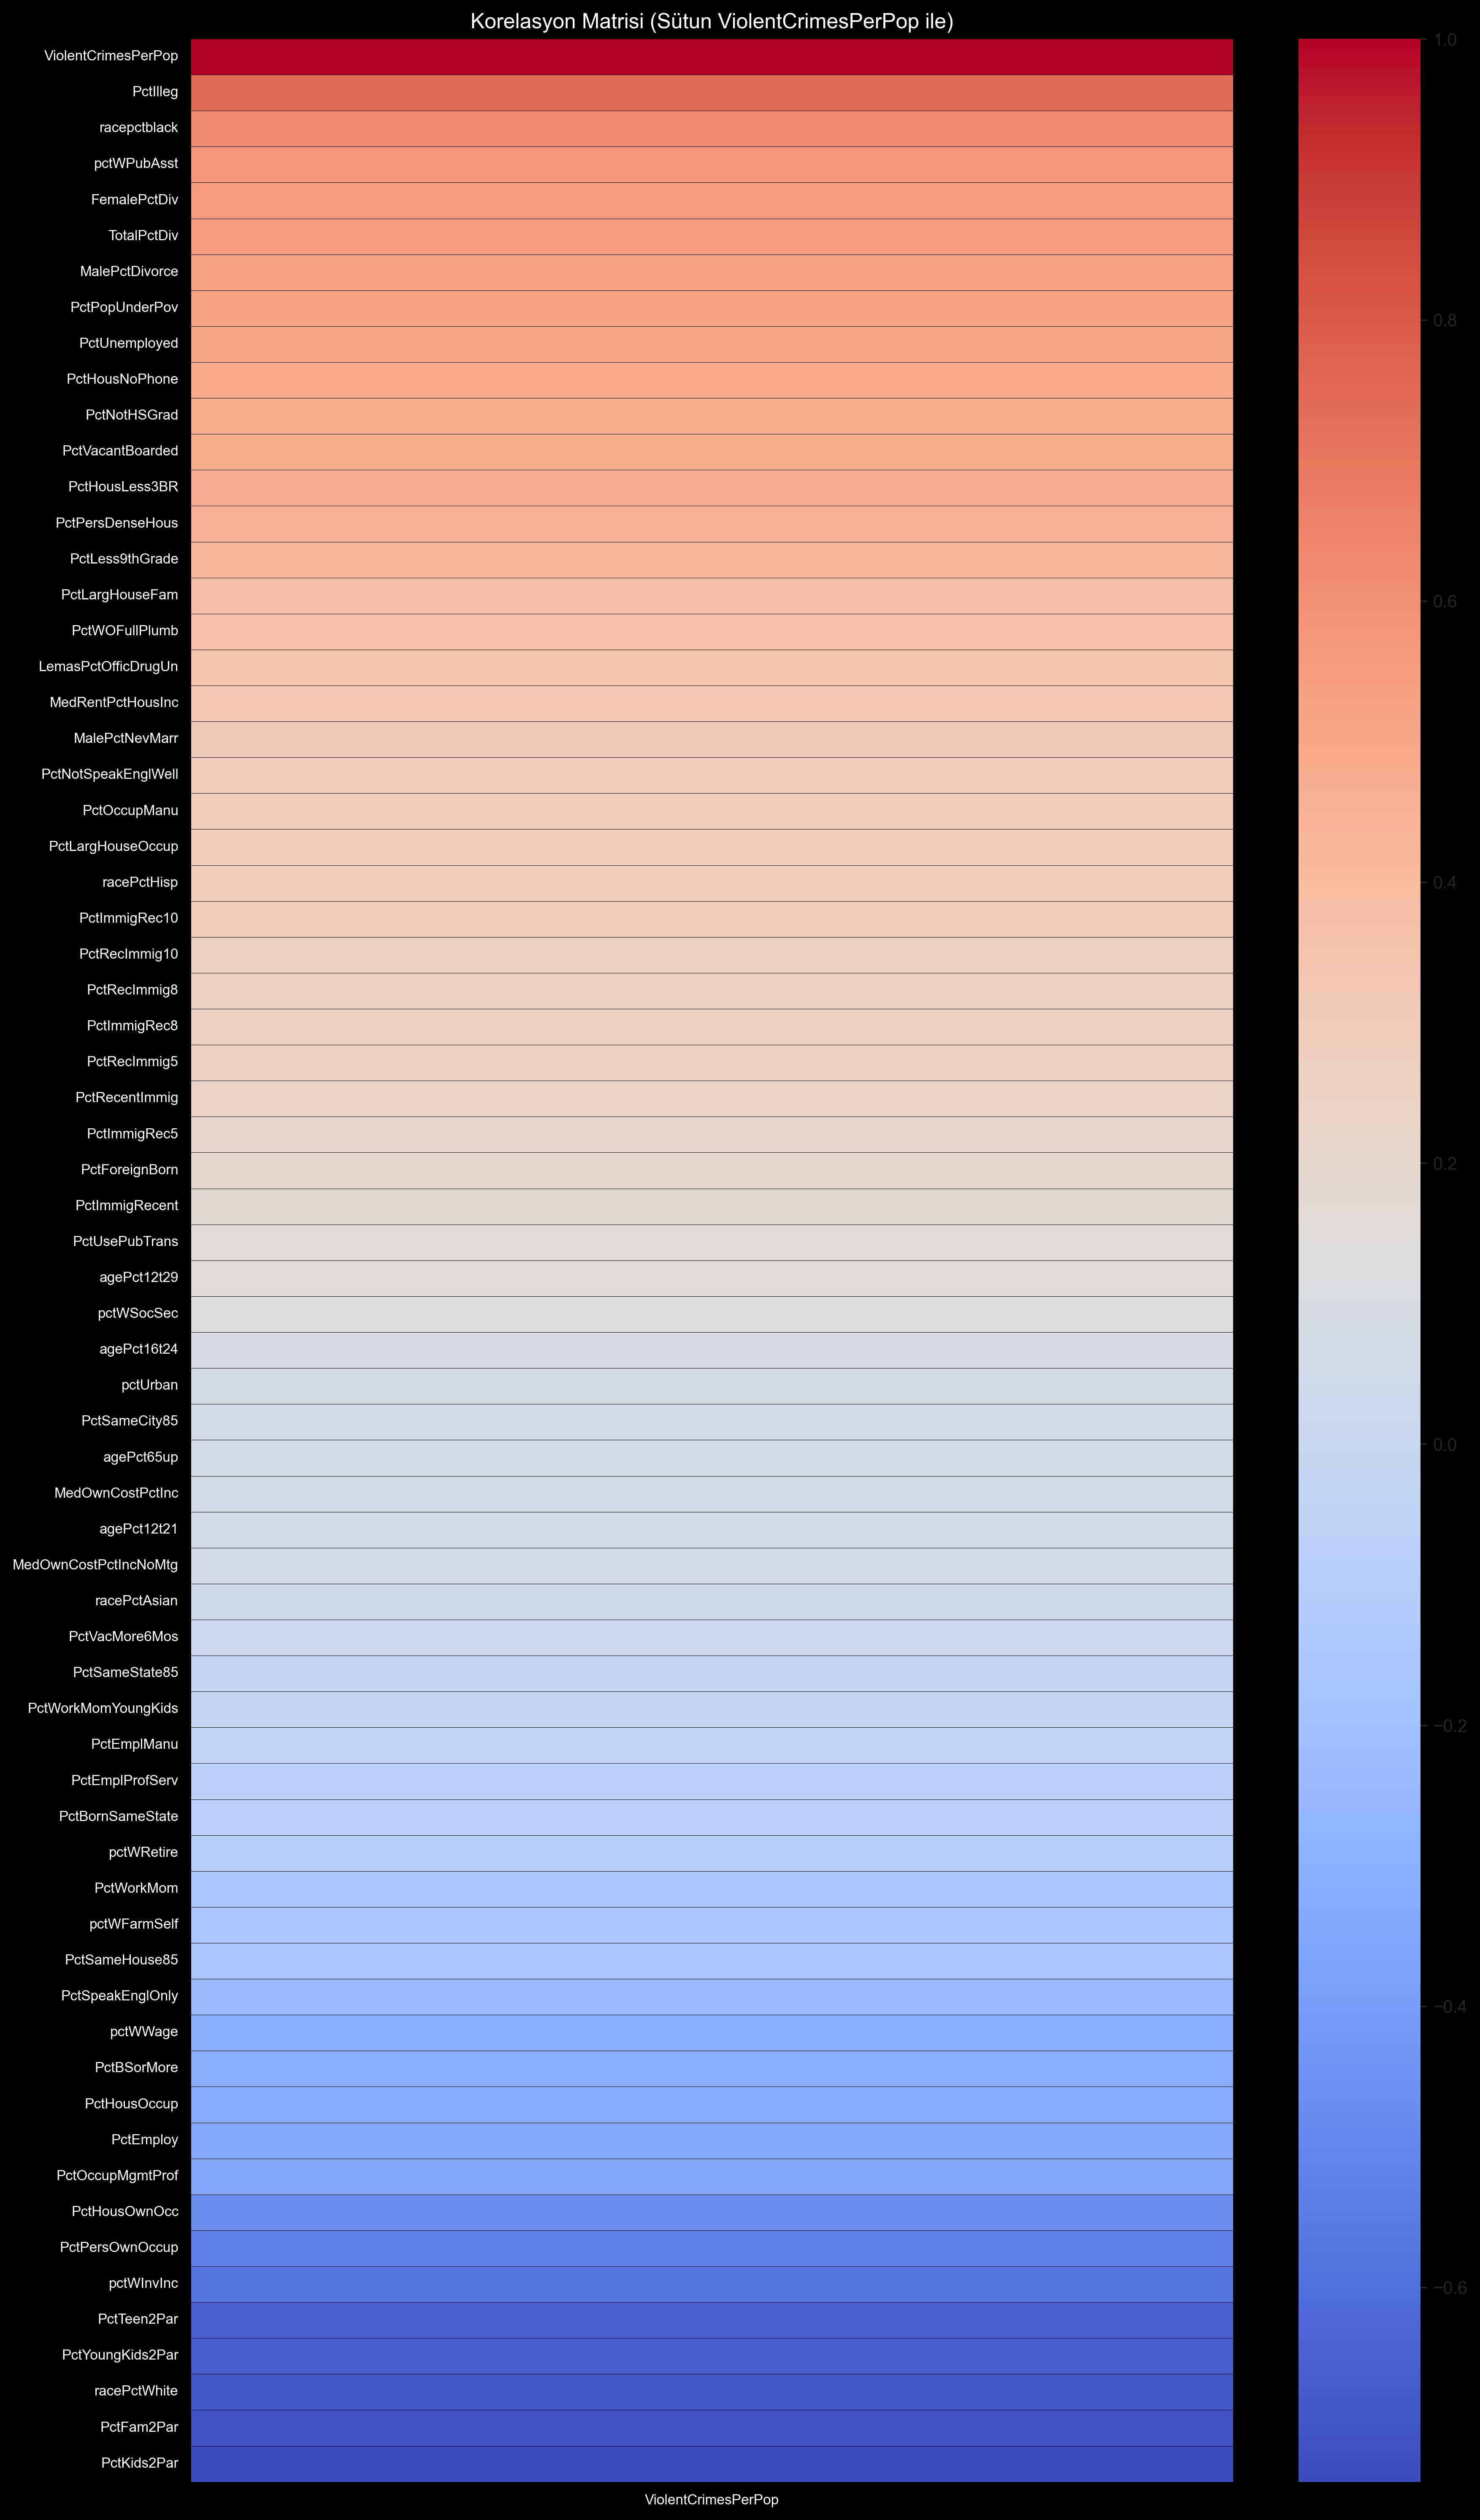

In [12]:
# Korelasyon matrisi (sayısal sütunlar)
corr_matrix = df_final.corr(numeric_only=True)
print(df_final.columns.tolist())
# 100. sütun baz alınarak korelasyonlar
target_col = 'ViolentCrimesPerPop'
if target_col not in corr_matrix.columns:
    corr_matrix[target_col] = df_final[target_col]
    
target_corr = corr_matrix[[target_col]].sort_values(by=target_col, ascending=False)

# Visualization
fig, ax = plt.subplots(figsize=(12, 20), dpi=300, facecolor='black')

sns.heatmap(
    target_corr,
    cmap='coolwarm',
    annot=False,
    cbar=True,
    ax=ax,
    linewidths=0.2,
    linecolor='black',
    xticklabels=True,
    yticklabels=True
)

ax.set_facecolor('black')
ax.tick_params(colors='white', labelsize=8)
plt.title(f"Korelasyon Matrisi (Sütun {target_col} ile)", color='white')

plt.tight_layout()
plt.savefig("figures/correlation_matrix_toCrimeRates.png", facecolor=fig.get_facecolor())
plt.show()

# Excel çıktısı
target_corr.to_excel("communities+and+crime/correlation_to_column100.xlsx")


C:\Users\juanr\AppData\Local\Temp\ipykernel_16668\862273894.py:42: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\juanr\AppData\Local\Temp\ipykernel_16668\862273894.py:43: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig("figures/correlation_graph.png", dpi=300)
C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


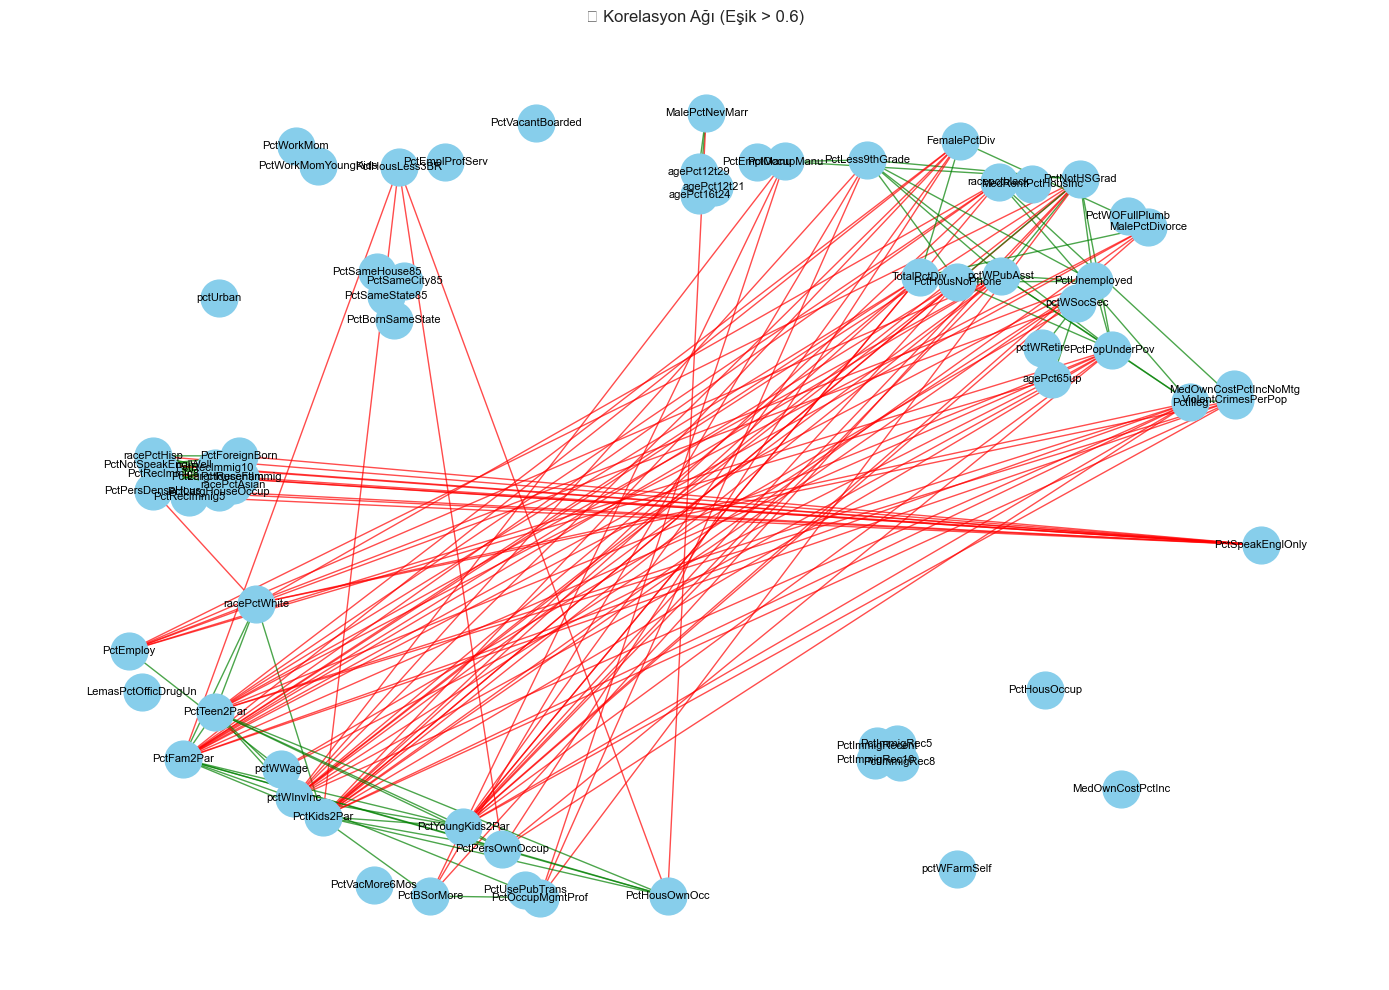

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Excel'den korelasyon matrisi yükle
corr_matrix = pd.read_excel("communities+and+crime/correlation_rates.xlsx", index_col=0)

# Korelasyon eşiği
threshold = 0.6

# Boş grafik başlat
G = nx.Graph()

# Düğümleri ekle
for col in corr_matrix.columns:
    G.add_node(col)

# Kenarları ekle (sadece eşik üzeri korelasyonlar)
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) >= threshold:
            G.add_edge(
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                weight=corr_val
            )

# Grafik çizimi
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)

edges = G.edges(data=True)
edge_colors = ['red' if d['weight'] < 0 else 'green' for (_, _, d) in edges]

nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

plt.title(f"📈 Korelasyon Ağı (Eşik > {threshold})")
plt.axis('off')
plt.tight_layout()
plt.savefig("figures/correlation_graph.png", dpi=300)
plt.show()


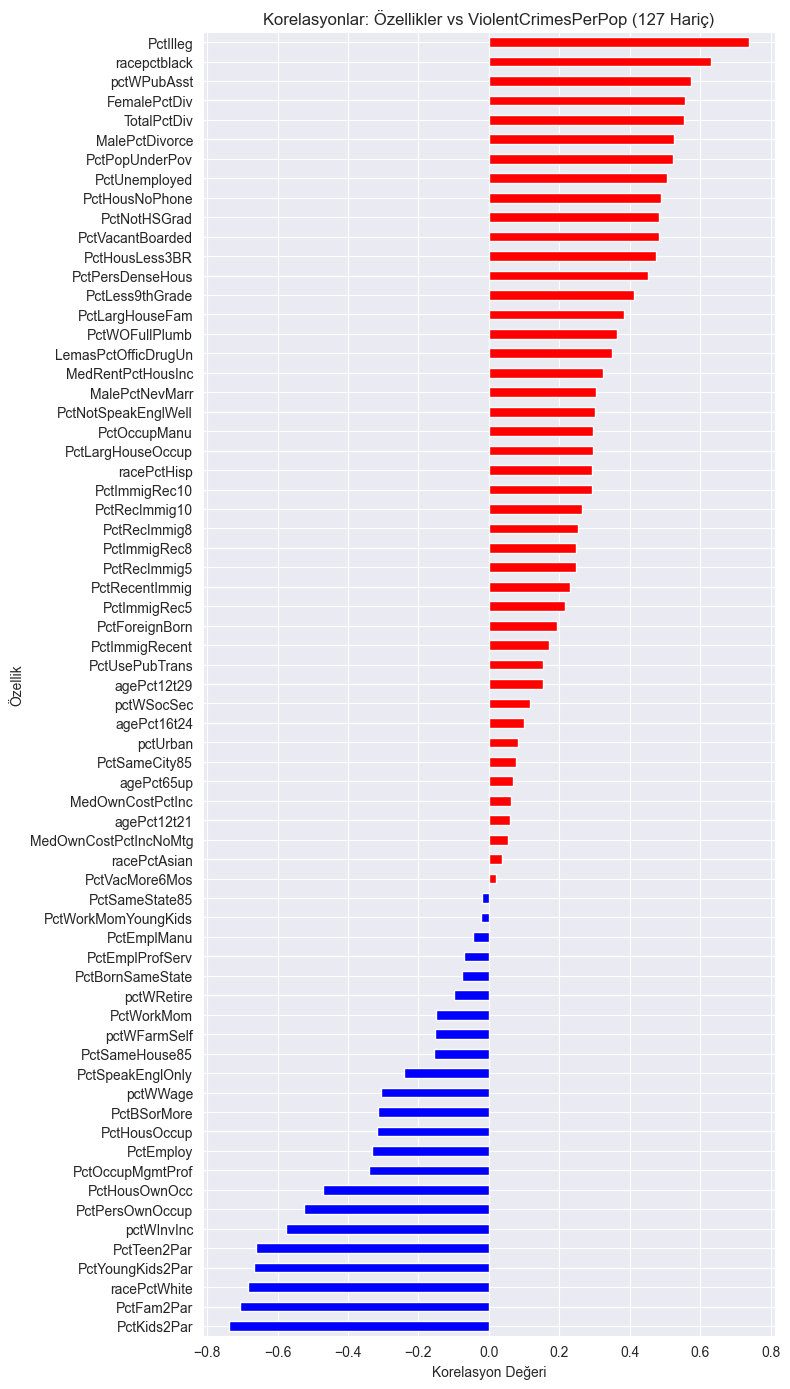

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Dosyayı oku
corr_df = pd.read_excel("communities+and+crime/correlation_to_column100.xlsx", index_col=0)
target_col = corr_df.columns[0]

# Index'i string yap (garanti çözüm)
corr_df.index = corr_df.index.map(str)
target_col = str(target_col)

# '127' özelliğini ve hedef sütunu çıkar
corr_series = corr_df.loc[
    (corr_df.index != target_col) & (corr_df.index != "127"),
    target_col
].sort_values()

# Renk ataması
colors = ['red' if val > 0 else 'blue' for val in corr_series]

# Grafik
plt.figure(figsize=(8, 14))
corr_series.plot(kind='barh', color=colors)
plt.title(f"Korelasyonlar: Özellikler vs {target_col} (127 Hariç)")
plt.xlabel("Korelasyon Değeri")
plt.ylabel("Özellik")
plt.tight_layout()
plt.savefig("figures/correlation_bar_plot_excluding_127.png", dpi=300)
plt.show()


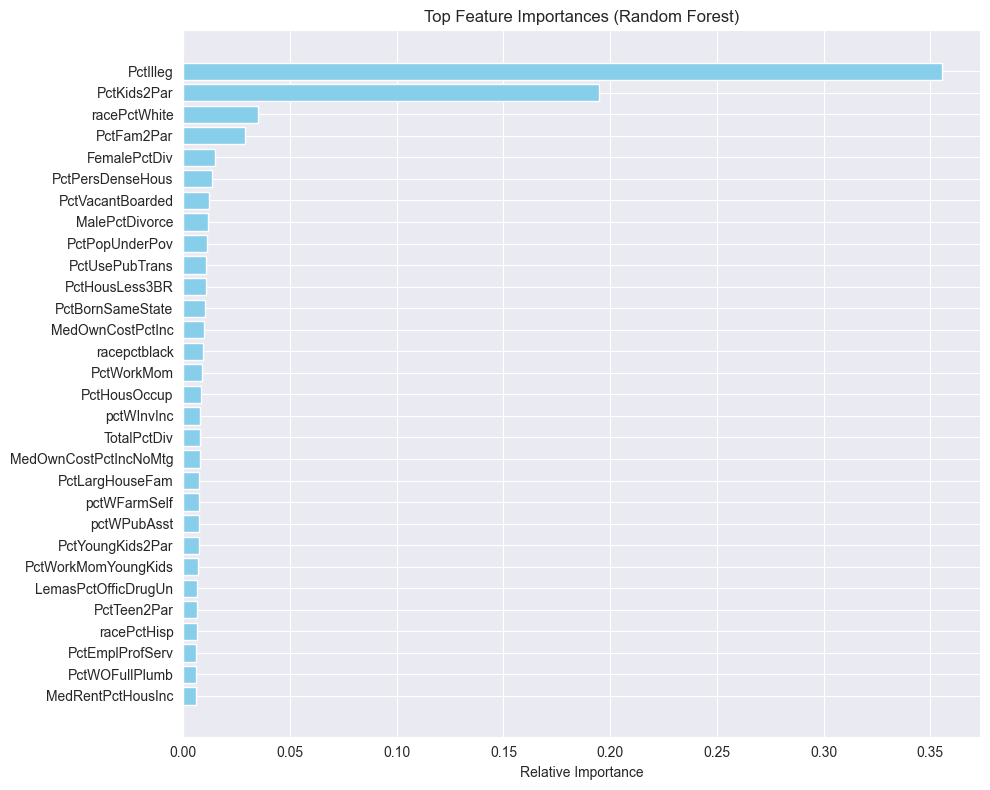

In [16]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Veriyi oku
df = pd.read_excel("communities+and+crime/kinda_cleaned.xlsx")

# Hedef sütun (örn: "100")
target_col = df_final.columns[-1]
X = df.drop(columns=[target_col])
y = df[target_col]

# Model eğit
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Önem skorlarını al
importances = model.feature_importances_
feature_names = X.columns

# DataFrame'e aktar
imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(30)

# Çizim
plt.figure(figsize=(10, 8))
plt.barh(imp_df['Feature'], imp_df['Importance'], color='skyblue')
plt.xlabel("Relative Importance")
plt.title("Top Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/random_forest_feature_importances.png", dpi=300)
plt.show()


In [17]:
import pandas as pd
import numpy as np

# Veriyi yükle
df = pd.read_excel("communities+and+crime/kinda_cleaned.xlsx")
X = df.drop(columns=[target_col])
y = df[target_col]

# Özellik isimlerini string olarak al
feature_names = X.columns.astype(str)

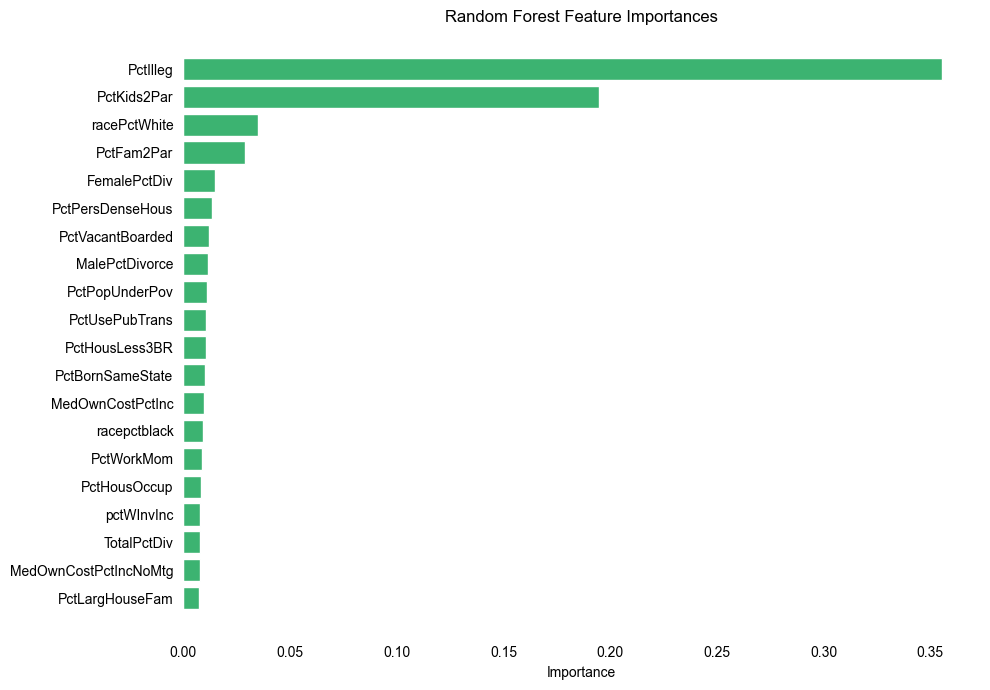

In [18]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Modeli eğit
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Önem skorlarını al
importances = rf_model.feature_importances_
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(20)

# Grafik çizimi
fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

ax.barh(imp_df['Feature'], imp_df['Importance'], color='mediumseagreen')
ax.set_title("Random Forest Feature Importances", color='black')
ax.set_xlabel("Importance", color='black')
ax.set_facecolor('white')  # İç alanı da beyaz yap!
ax.tick_params(colors='black')  # Eksendeki yazılar siyah
ax.invert_yaxis()

plt.tight_layout()
plt.savefig("figures/feature_importance_random_forest.png", dpi=300, facecolor='white')
plt.show()

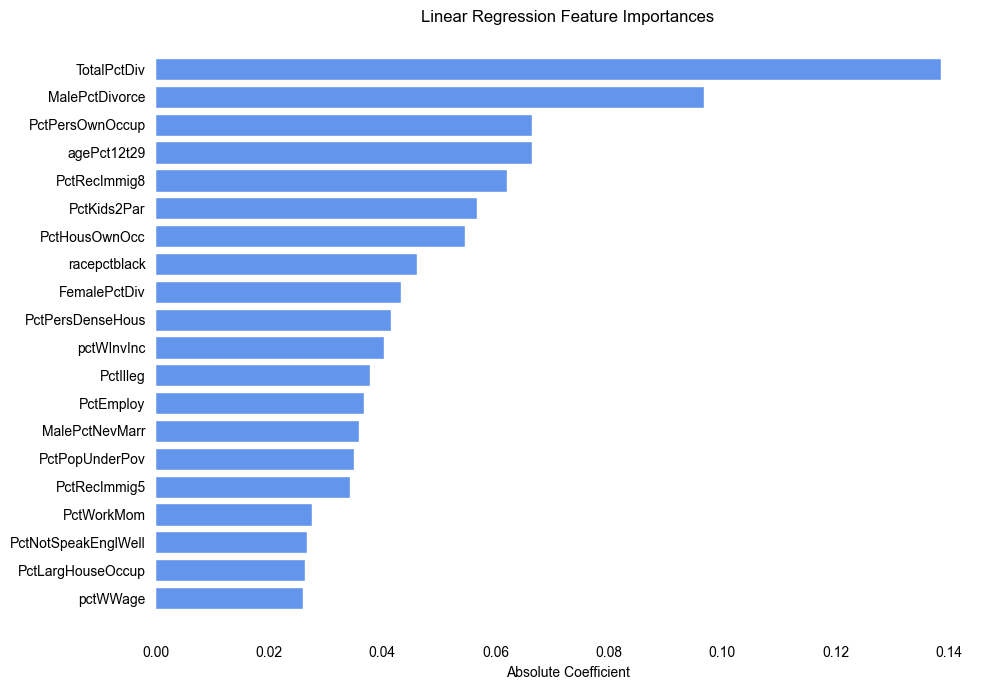

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalize et
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modeli eğit
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)

# Katsayıların mutlak değeri
importances = np.abs(lr_model.coef_)
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(20)

# Grafik (düzenlenmiş)
fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

ax.barh(imp_df['Feature'], imp_df['Importance'], color='cornflowerblue')
ax.set_title("Linear Regression Feature Importances", color='black')
ax.set_xlabel("Absolute Coefficient", color='black')
ax.set_facecolor('white')  # İç alan
ax.tick_params(colors='black')  # Yazılar
ax.invert_yaxis()

plt.tight_layout()
plt.savefig("figures/feature_importance_linear_regression.png", dpi=300, facecolor='white')
plt.show()


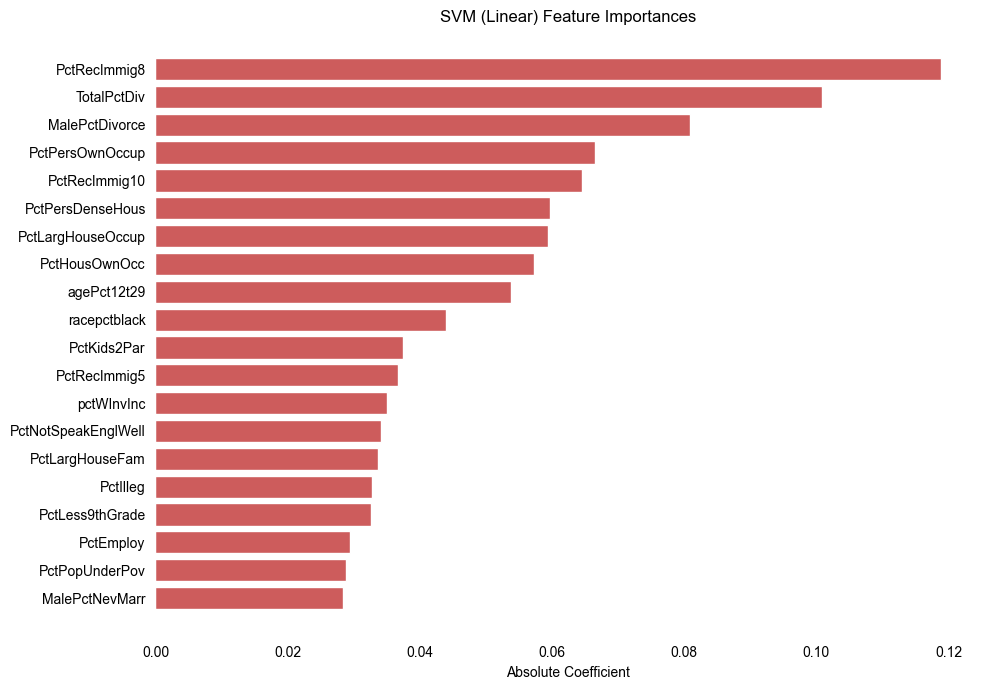

In [20]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Modeli eğit
svm_model = SVR(kernel='linear')
svm_model.fit(X_scaled, y)

# Katsayıların mutlak değeri
importances = np.abs(svm_model.coef_.flatten())
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(20)

# Grafik (düzenlenmiş)
fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

ax.barh(imp_df['Feature'], imp_df['Importance'], color='indianred')
ax.set_title("SVM (Linear) Feature Importances", color='black')
ax.set_xlabel("Absolute Coefficient", color='black')
ax.set_facecolor('white')
ax.tick_params(colors='black')
ax.invert_yaxis()

plt.tight_layout()
plt.savefig("figures/feature_importance_svm_linear.png", dpi=300, facecolor='white')
plt.show()

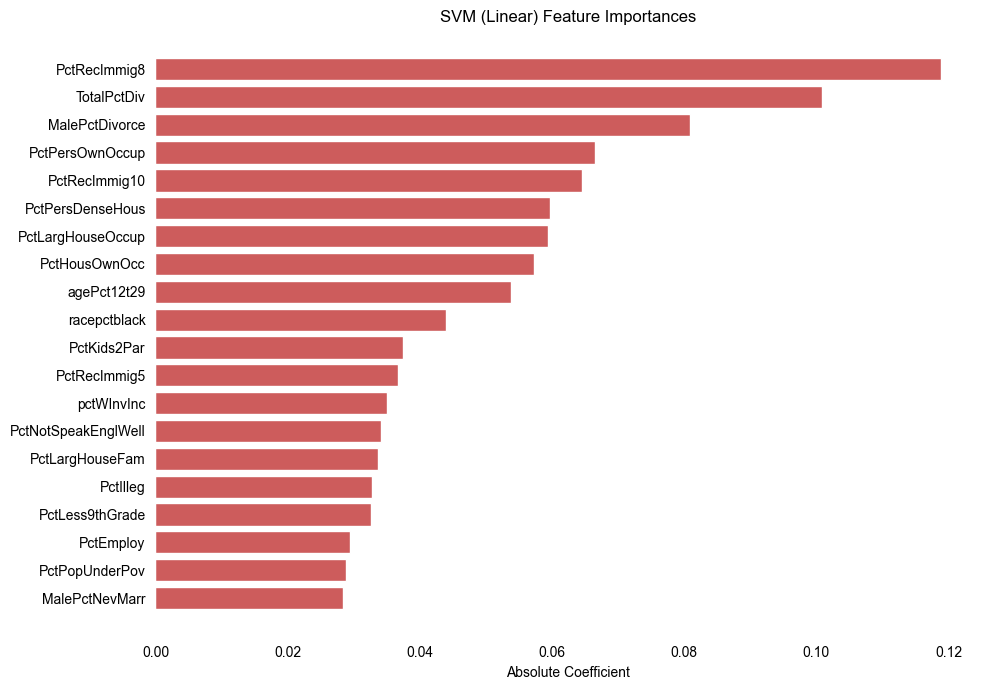

In [21]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Modeli eğit
svm_model = SVR(kernel='linear')
svm_model.fit(X_scaled, y)

# Katsayıların mutlak değeri
importances = np.abs(svm_model.coef_.flatten())
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(20)

# Grafik (düzenlenmiş)
fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

ax.barh(imp_df['Feature'], imp_df['Importance'], color='indianred')
ax.set_title("SVM (Linear) Feature Importances", color='black')
ax.set_xlabel("Absolute Coefficient", color='black')
ax.set_facecolor('white')
ax.tick_params(colors='black')
ax.invert_yaxis()

plt.tight_layout()
plt.savefig("figures/feature_importance_svm_linear.png", dpi=300, facecolor='white')
plt.show()

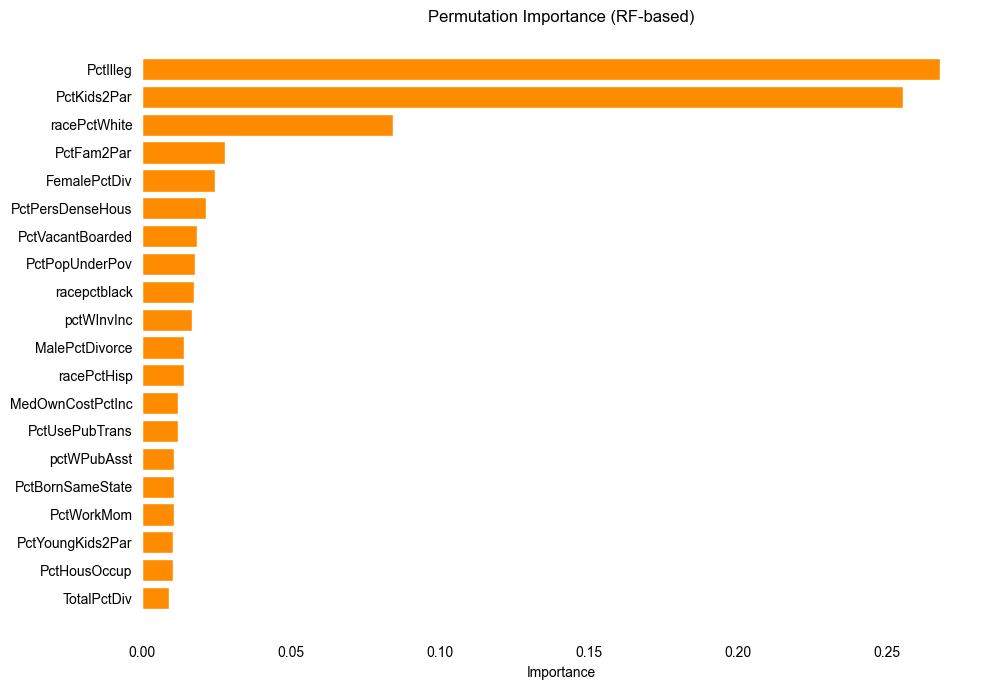

In [22]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Permutasyon önem analizi
perm = permutation_importance(rf_model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
importances = perm.importances_mean

imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(20)

# Grafik (düzenlenmiş)
fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

ax.barh(imp_df['Feature'], imp_df['Importance'], color='darkorange')
ax.set_title("Permutation Importance (RF-based)", color='black')
ax.set_xlabel("Importance", color='black')
ax.set_facecolor('white')
ax.tick_params(colors='black')
ax.invert_yaxis()

plt.tight_layout()
plt.savefig("figures/feature_importance_permutation.png", dpi=300, facecolor='white')
plt.show()


In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Veriyi yükle
df = pd.read_excel("communities+and+crime/kinda_cleaned.xlsx")

# Hedefi kategorilere ayır (5 sınıf)
def classify(val):
    if val < 0.20:  # Very Low
        return 0
    elif val < 0.40: # Low
        return 1
    elif val < 0.60: # Medium
        return 2
    elif val < 0.80: # High
        return 3
    else:
        return 4    # Very High

df["CrimeLevel"] = df[df.columns[-1]].apply(classify)

# Korelasyonu yüksek özellikleri yükle
corr_df = pd.read_excel("communities+and+crime/correlation_to_column100.xlsx", index_col=0)

corr_df.index = corr_df.index.map(str)
#corr_series = corr_df[corr_df.columns[0]].abs()  # absolute correlation values

top_features = corr_df[abs(corr_df[corr_df.columns[0]]) > 0.3].index.tolist()

#top_features = corr_series.drop("100", errors='ignore').sort_values(ascending=False).head(30).index.tolist()

top_features = [f for f in top_features if f != "100"]

X = df[top_features]
y = df["CrimeLevel"]

# Eksik varsa doldur
X = SimpleImputer(strategy='mean').fit_transform(X)

# Normalizasyon (sadece gerekli modeller için)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim/test böl (aynı bölme tüm modellerde kullanılacak)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_scaled, X_test_scaled = train_test_split(X_scaled, test_size=0.3, random_state=42)


✅ Logistic Regression Accuracy: 0.7462

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       370
           1       0.46      0.62      0.53       120
           2       0.33      0.05      0.08        64
           3       0.00      0.00      0.00        28
           4       0.64      0.94      0.76        17

    accuracy                           0.75       599
   macro avg       0.46      0.51      0.46       599
weighted avg       0.69      0.75      0.70       599



C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0

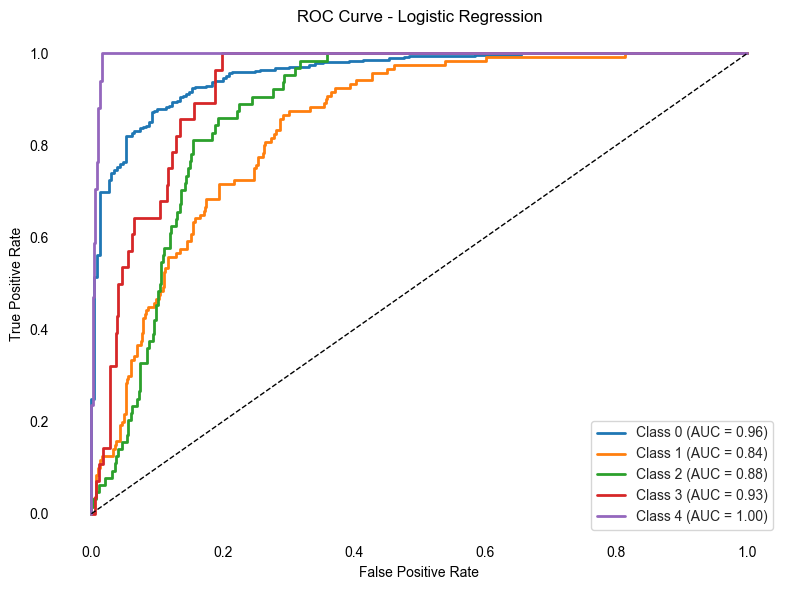

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Modeli eğit
log_model = LogisticRegression(C=0.1, max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Tahminler
y_pred = log_model.predict(X_test)
y_score = log_model.predict_proba(X_test)

# Accuracy ve classification report
acc = accuracy_score(y_test, y_pred)
print(f"✅ Logistic Regression Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC çizimi için y_test'i binarize et
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# ROC eğrisi çizimi
plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')  # ROC alanının arka planı beyaz

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Curve - Logistic Regression", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right", facecolor='white')
plt.tight_layout()
plt.savefig("figures/roc_logistic_regression.png", dpi=300, facecolor='white')
plt.show()


C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


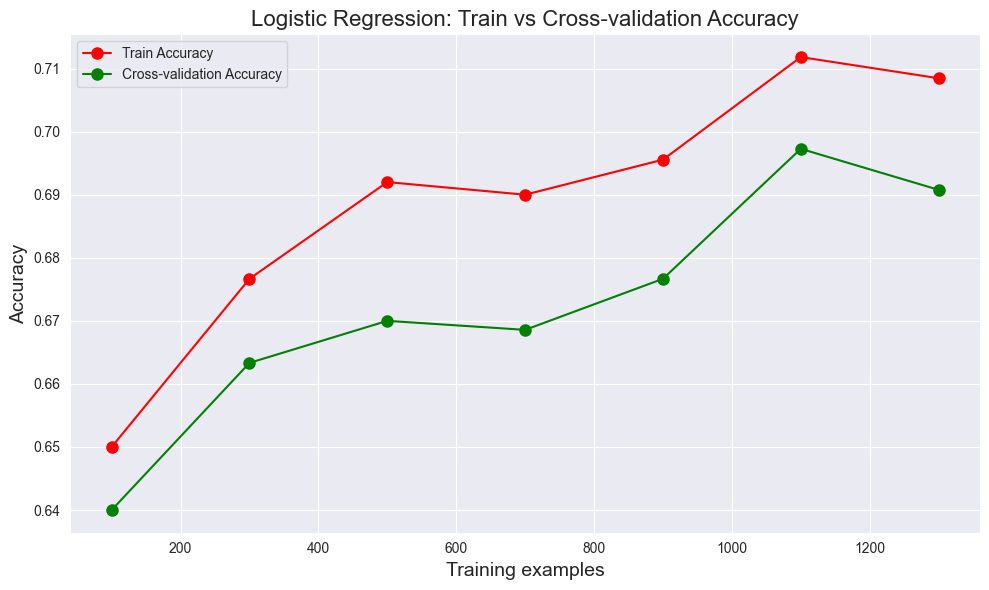

In [154]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Varying training sizes
train_sizes = [100, 300, 500, 700, 900, 1100, 1300]
train_accuracies = []
cv_accuracies = []

for size in train_sizes:
    X_subset = X_train[:size]
    y_subset = y_train[:size]

    model = LogisticRegression(C=0.1, max_iter=1000, random_state=42)
    model.fit(X_subset, y_subset)

    train_acc = model.score(X_subset, y_subset)
    cv_acc = cross_val_score(model, X_subset, y_subset, cv=5).mean()

    train_accuracies.append(train_acc)
    cv_accuracies.append(cv_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, 'ro-', label='Train Accuracy', markersize=8)
plt.plot(train_sizes, cv_accuracies, 'go-', label='Cross-validation Accuracy', markersize=8)
plt.xlabel("Training examples", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Logistic Regression: Train vs Cross-validation Accuracy", fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("logistic_train_vs_cv.png", dpi=300)
plt.show()

✅ SVM Accuracy: 0.9148

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       230
           1       0.88      0.92      0.90        92
           2       0.76      0.82      0.79        39
           3       0.69      0.55      0.61        20
           4       1.00      0.78      0.88        18

    accuracy                           0.91       399
   macro avg       0.86      0.81      0.83       399
weighted avg       0.91      0.91      0.91       399



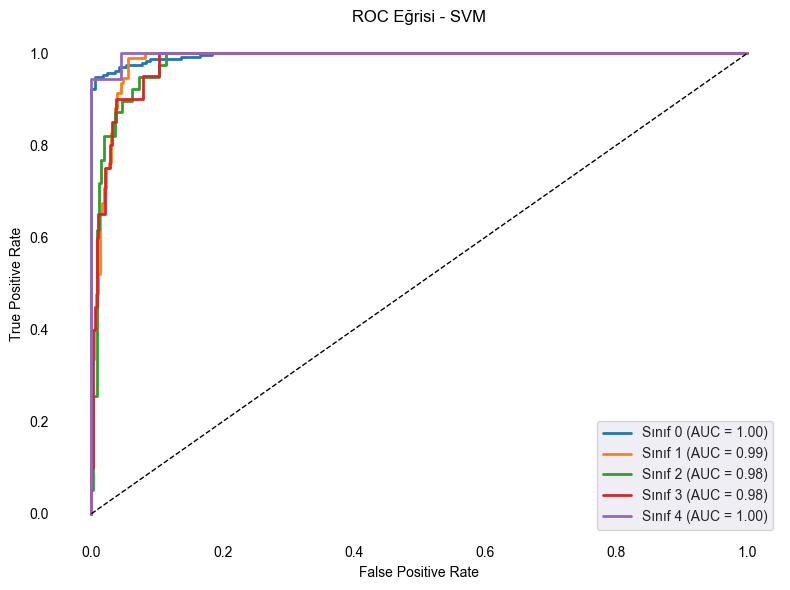

In [155]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# SVM modelini tanımla ve eğit
svm_model = SVC(C=0.5, kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Tahmin ve skor
y_pred = svm_model.predict(X_test)
y_score = svm_model.predict_proba(X_test)

# Accuracy ve classification report
acc = accuracy_score(y_test, y_pred)
print(f"✅ SVM Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC için binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# ROC Eğrisi
plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Eğrisi - SVM", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("figures/roc_svm.png", dpi=300, facecolor='white')
plt.show()

C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


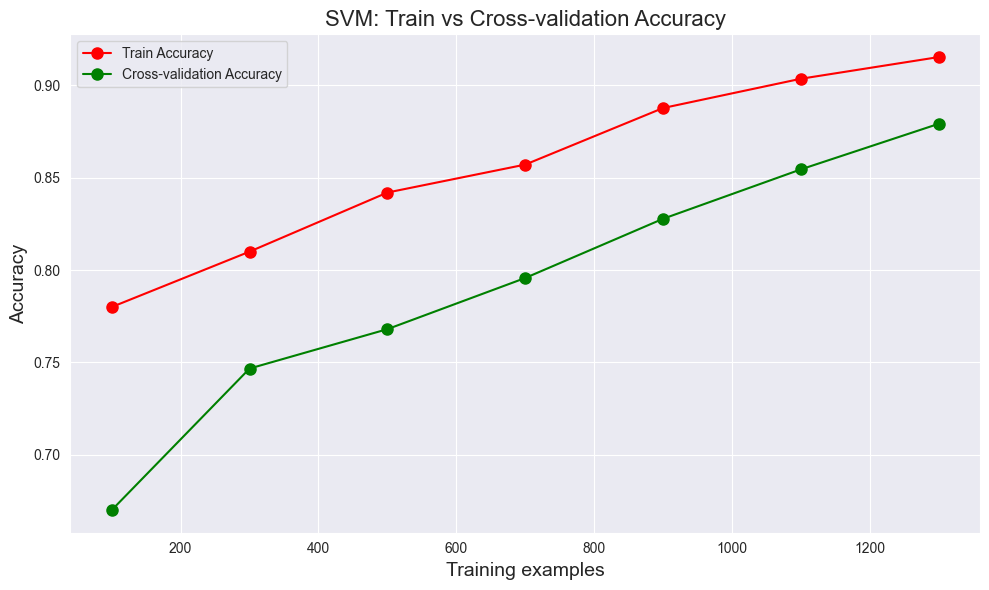

In [156]:
# Training sizes to test
train_sizes = [100, 300, 500, 700, 900, 1100, 1300]
train_accuracies = []
cv_accuracies = []

# Evaluate SVM on different training sizes
for size in train_sizes:
    X_subset = X_train[:size]
    y_subset = y_train[:size]

    model = SVC(C=0.5, kernel='linear', probability=True, random_state=42)
    model.fit(X_subset, y_subset)

    train_acc = model.score(X_subset, y_subset)
    cv_acc = cross_val_score(model, X_subset, y_subset, cv=5).mean()

    train_accuracies.append(train_acc)
    cv_accuracies.append(cv_acc)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, 'ro-', label='Train Accuracy', markersize=8)
plt.plot(train_sizes, cv_accuracies, 'go-', label='Cross-validation Accuracy', markersize=8)
plt.xlabel("Training examples", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("SVM: Train vs Cross-validation Accuracy", fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("svm_train_vs_cv.png", dpi=300)
plt.show()

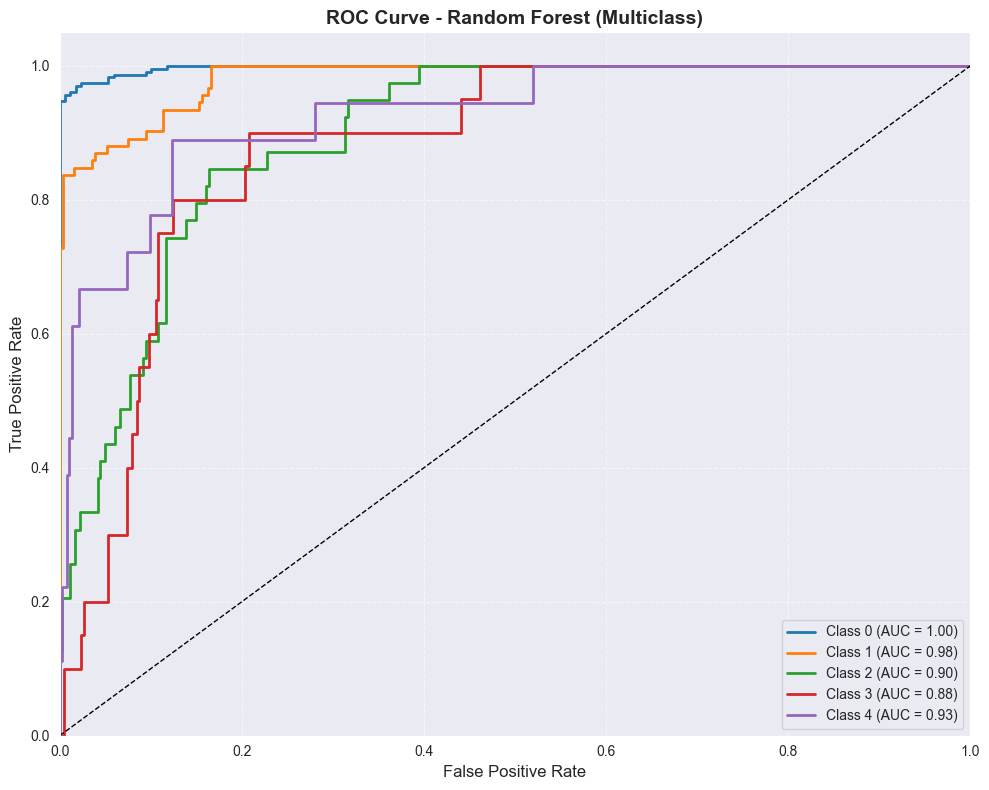

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assume X, y are defined
# y must be integer-labeled multiclass (e.g., 0-4)
y_bin = label_binarize(y, classes=[0, 1, 2, 3, 4])
n_classes = y_bin.shape[1]

# Fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=30, min_samples_leaf=30, bootstrap=True, max_samples=0.6, max_features='log2',random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)

# Predict probabilities
y_score = rf_model.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve - Random Forest (Multiclass)", fontsize=14, weight='bold')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

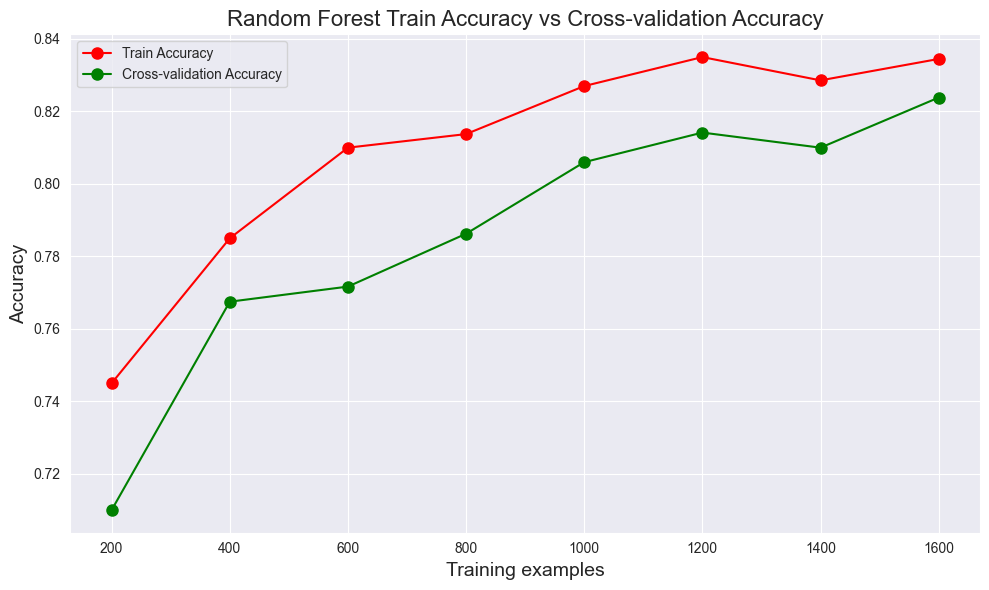

In [158]:
# Define a list of different training example sizes to test
train_sizes = [200, 400, 600, 800, 1000, 1200, 1400, 1600]

train_accuracies = []
cv_accuracies = []

# Iterate over the training sizes
for size in train_sizes:
    # Subset the training data based on the current size
    X_train_subset = X_train[:size]
    y_train_subset = y_train[:size]

    # Train Random Forest model
    rf_model = RandomForestClassifier(
        n_estimators=100, max_depth=3, min_samples_split=30, min_samples_leaf=30, bootstrap=True, max_samples=0.6, max_features='log2',random_state=42, oob_score=True
    )
    
    rf_model.fit(X_train_subset, y_train_subset)

    # Train accuracy
    train_acc = accuracy_score(y_train_subset, rf_model.predict(X_train_subset))
    train_accuracies.append(train_acc)

    # Cross-validation accuracy
    cv_acc = cross_val_score(rf_model, X_train_subset, y_train_subset, cv=5, scoring='accuracy').mean()
    cv_accuracies.append(cv_acc)

# Plot the accuracies
plt.figure(figsize=(10, 6))

plt.plot(train_sizes, train_accuracies, 'ro-', label='Train Accuracy', markersize=8)  # Red circles for Train Accuracy
plt.plot(train_sizes, cv_accuracies, 'go-', label='Cross-validation Accuracy', markersize=8)  # Green circles for CV Accuracy

plt.xlabel("Training examples", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Random Forest Train Accuracy vs Cross-validation Accuracy", fontsize=16)
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

✅ Decision Tree Accuracy: 1.0000

📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        18

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



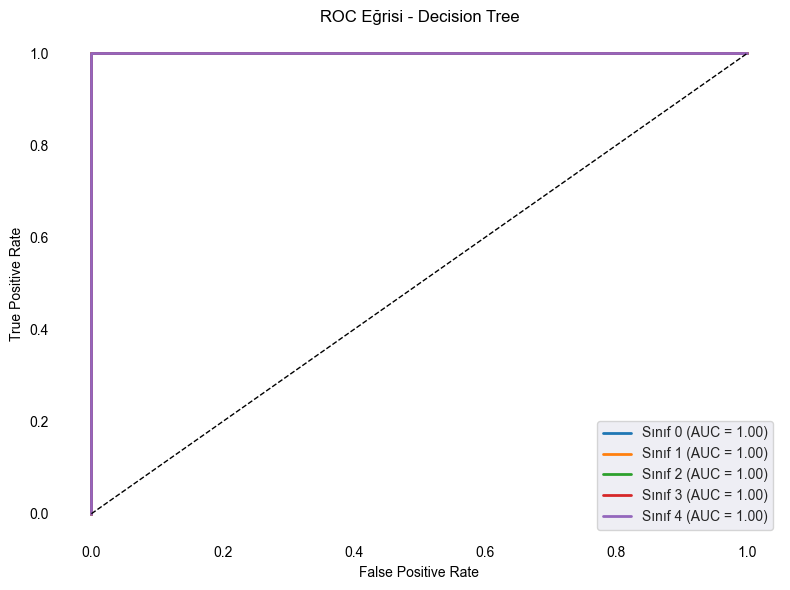

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Modeli eğit
dt_model = DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)

# Tahmin ve skor
y_pred = dt_model.predict(X_test)
y_score = dt_model.predict_proba(X_test)

# Accuracy ve classification report
acc = accuracy_score(y_test, y_pred)
print(f"✅ Decision Tree Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC için binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# ROC Eğrisi çizimi
plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Eğrisi - Decision Tree", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("figures/roc_decision_tree.png", dpi=300, facecolor='white')
plt.show()


C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


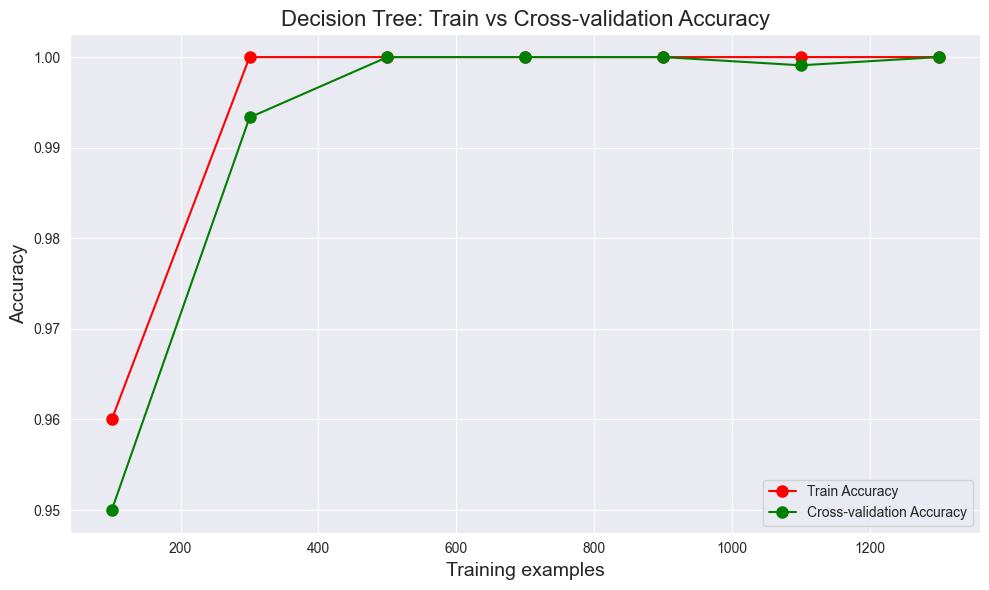

In [160]:
# Training sizes
train_sizes = [100, 300, 500, 700, 900, 1100, 1300]
train_accuracies = []
cv_accuracies = []

# Evaluate Decision Tree at different training sizes
for size in train_sizes:
    X_subset = X_train[:size]
    y_subset = y_train[:size]

    model = DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=10, random_state=42)
    model.fit(X_subset, y_subset)

    train_acc = model.score(X_subset, y_subset)
    cv_acc = cross_val_score(model, X_subset, y_subset, cv=5).mean()

    train_accuracies.append(train_acc)
    cv_accuracies.append(cv_acc)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, 'ro-', label='Train Accuracy', markersize=8)
plt.plot(train_sizes, cv_accuracies, 'go-', label='Cross-validation Accuracy', markersize=8)
plt.xlabel("Training examples", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Decision Tree: Train vs Cross-validation Accuracy", fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("decision_tree_train_vs_cv.png", dpi=300)
plt.show()

✅ KNN Accuracy: 0.7268

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       230
           1       0.56      0.64      0.60        92
           2       0.34      0.31      0.32        39
           3       0.00      0.00      0.00        20
           4       0.78      0.39      0.52        18

    accuracy                           0.73       399
   macro avg       0.51      0.45      0.47       399
weighted avg       0.69      0.73      0.71       399



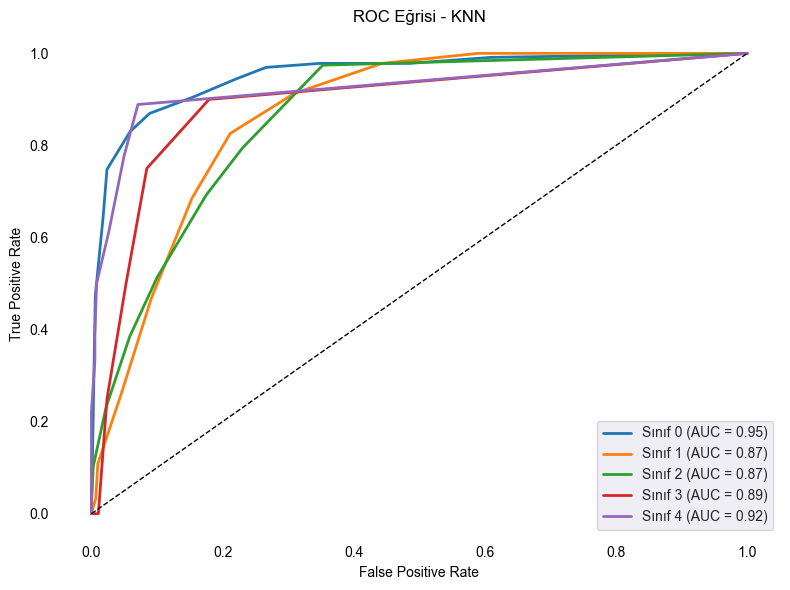

In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Modeli oluştur ve eğit
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)

# Tahminler
y_pred = knn_model.predict(X_test)
y_score = knn_model.predict_proba(X_test)

# Doğruluk ve rapor
acc = accuracy_score(y_test, y_pred)
print(f"✅ KNN Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC eğrisi
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Eğrisi - KNN", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("figures/roc_knn.png", dpi=300, facecolor='white')
plt.show()


C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


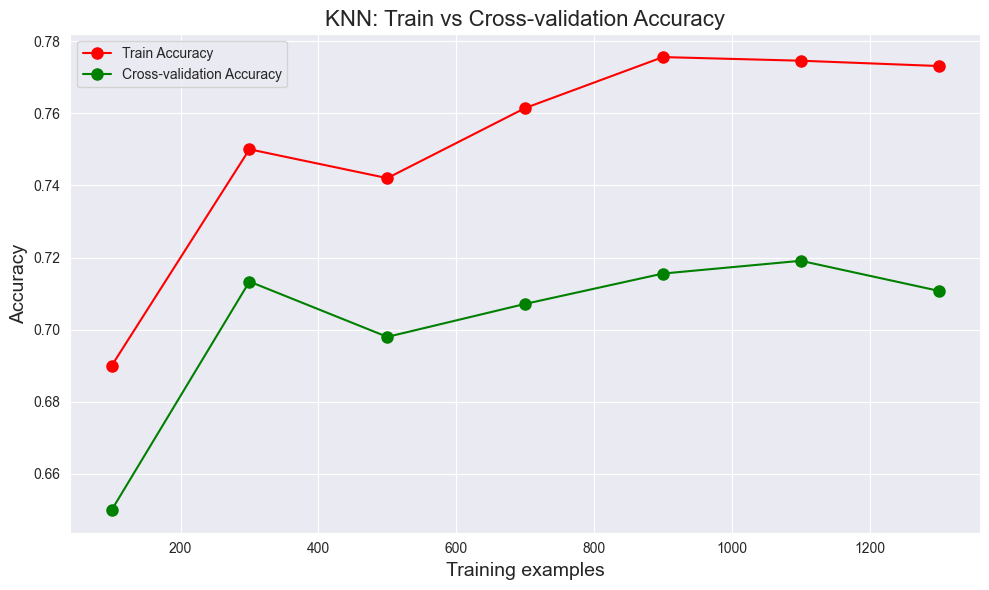

In [171]:
train_sizes = [100, 300, 500, 700, 900, 1100, 1300]
train_accuracies = []
cv_accuracies = []

for size in train_sizes:
    X_subset = X_train[:size]
    y_subset = y_train[:size]

    model = KNeighborsClassifier(n_neighbors=11)
    model.fit(X_subset, y_subset)

    train_acc = model.score(X_subset, y_subset)
    cv_acc = cross_val_score(model, X_subset, y_subset, cv=5).mean()

    train_accuracies.append(train_acc)
    cv_accuracies.append(cv_acc)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, 'ro-', label='Train Accuracy', markersize=8)
plt.plot(train_sizes, cv_accuracies, 'go-', label='Cross-validation Accuracy', markersize=8)
plt.xlabel("Training examples", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("KNN: Train vs Cross-validation Accuracy", fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/train_vs_cv_knn.png", dpi=300)
plt.show()

✅ Naive Bayes Accuracy: 0.7895

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       230
           1       0.58      0.73      0.64        92
           2       0.62      0.77      0.69        39
           3       0.78      0.70      0.74        20
           4       0.88      0.83      0.86        18

    accuracy                           0.79       399
   macro avg       0.76      0.77      0.76       399
weighted avg       0.82      0.79      0.80       399



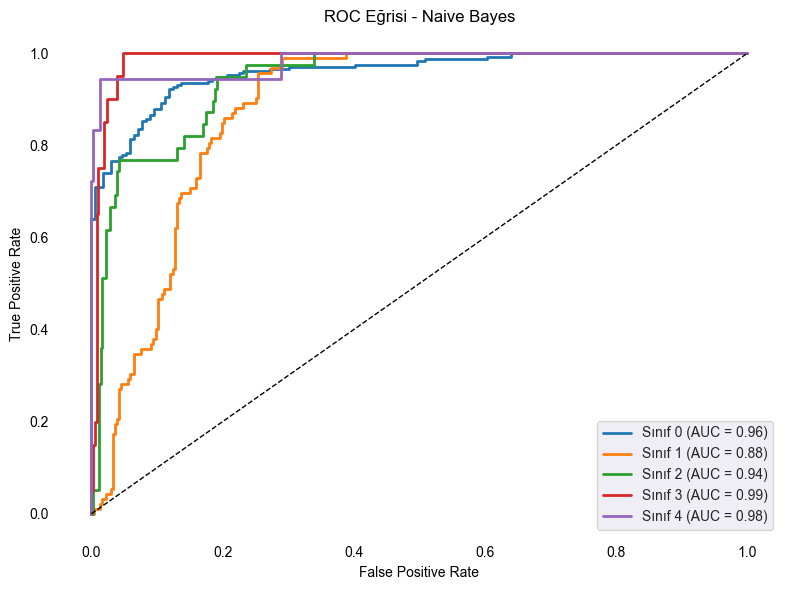

In [162]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Modeli oluştur ve eğit
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Tahminler
y_pred = nb_model.predict(X_test)
y_score = nb_model.predict_proba(X_test)

# Doğruluk ve rapor
acc = accuracy_score(y_test, y_pred)
print(f"✅ Naive Bayes Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC eğrisi
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Eğrisi - Naive Bayes", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("figures/roc_naive_bayes.png", dpi=300, facecolor='white')
plt.show()


C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


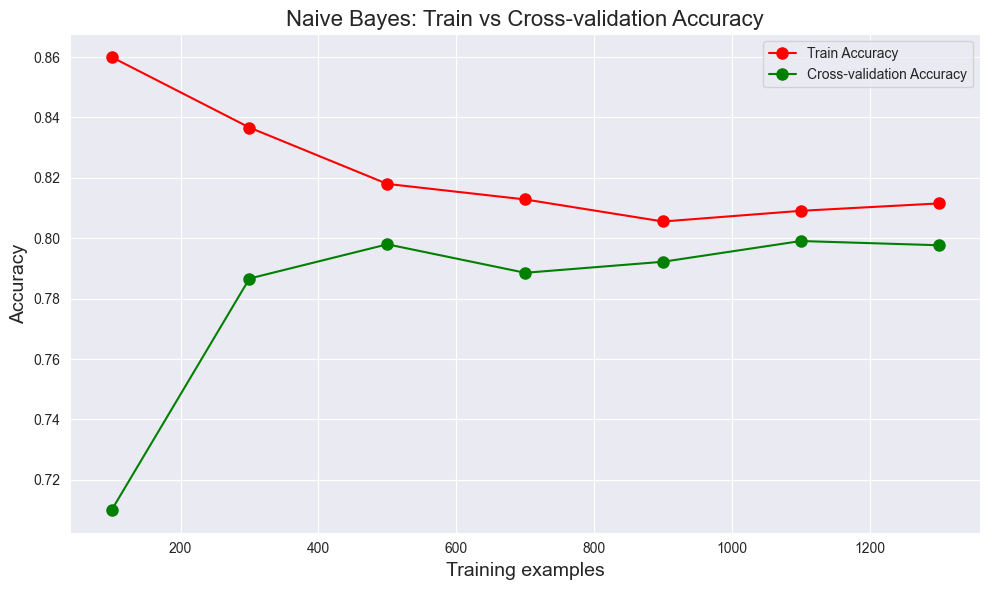

In [163]:
train_sizes = [100, 300, 500, 700, 900, 1100, 1300]
train_accuracies = []
cv_accuracies = []

for size in train_sizes:
    X_subset = X_train[:size]
    y_subset = y_train[:size]

    model = GaussianNB()
    model.fit(X_subset, y_subset)

    train_acc = model.score(X_subset, y_subset)
    cv_acc = cross_val_score(model, X_subset, y_subset, cv=5).mean()

    train_accuracies.append(train_acc)
    cv_accuracies.append(cv_acc)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, 'ro-', label='Train Accuracy', markersize=8)
plt.plot(train_sizes, cv_accuracies, 'go-', label='Cross-validation Accuracy', markersize=8)
plt.xlabel("Training examples", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Naive Bayes: Train vs Cross-validation Accuracy", fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/train_vs_cv_naive_bayes.png", dpi=300)
plt.show()

✅ Gradient Boosting Accuracy: 1.0000

📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        18

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



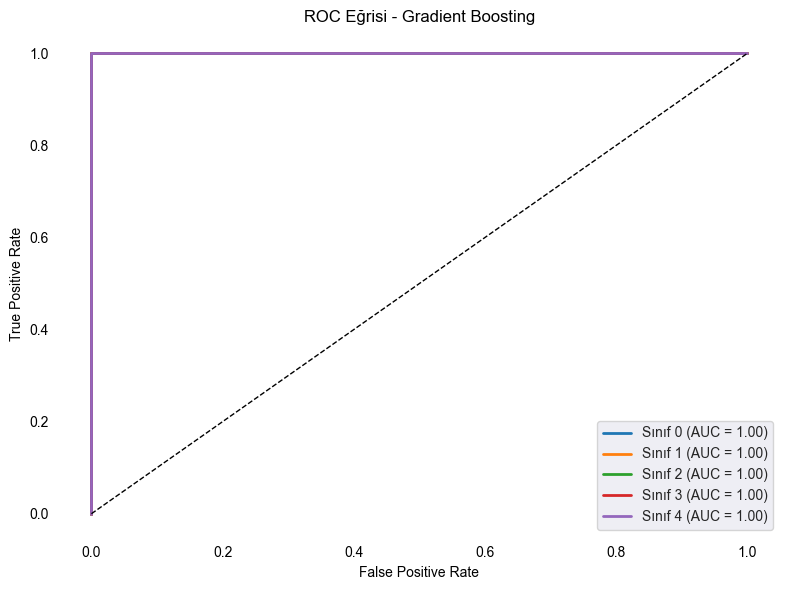

In [165]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Modeli eğit
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8, random_state=42)
#max_depth, learning_rate and subsample added to avoid overfitting

gb_model.fit(X_train, y_train)

# Tahminler
y_pred = gb_model.predict(X_test)
y_score = gb_model.predict_proba(X_test)

# Accuracy ve classification report
acc = accuracy_score(y_test, y_pred)
print(f"✅ Gradient Boosting Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC çizimi
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Eğrisi - Gradient Boosting", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("figures/roc_gradient_boosting.png", dpi=300, facecolor='white')
plt.show()


C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


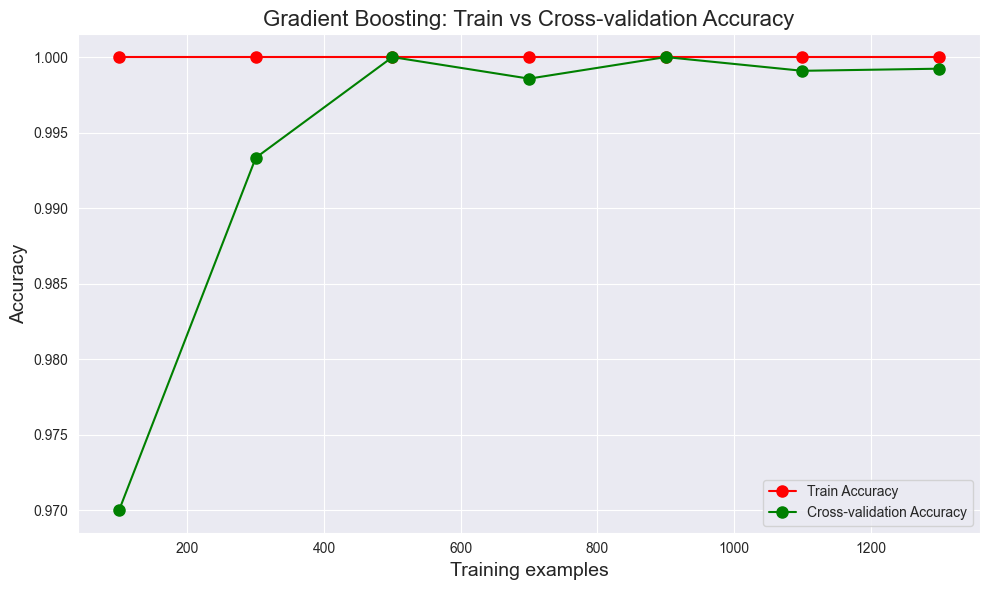

In [166]:
train_sizes = [100, 300, 500, 700, 900, 1100, 1300]
train_accuracies = []
cv_accuracies = []

for size in train_sizes:
    X_subset = X_train[:size]
    y_subset = y_train[:size]

    model = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        random_state=42
    )
    model.fit(X_subset, y_subset)

    train_acc = model.score(X_subset, y_subset)
    cv_acc = cross_val_score(model, X_subset, y_subset, cv=5).mean()

    train_accuracies.append(train_acc)
    cv_accuracies.append(cv_acc)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, 'ro-', label='Train Accuracy', markersize=8)
plt.plot(train_sizes, cv_accuracies, 'go-', label='Cross-validation Accuracy', markersize=8)
plt.xlabel("Training examples", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Gradient Boosting: Train vs Cross-validation Accuracy", fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/train_vs_cv_gradient_boosting.png", dpi=300)
plt.show()

✅ CatBoost Accuracy: 0.9900

📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       0.98      1.00      0.99        92
           2       0.95      0.95      0.95        39
           3       1.00      0.90      0.95        20
           4       1.00      1.00      1.00        18

    accuracy                           0.99       399
   macro avg       0.99      0.97      0.98       399
weighted avg       0.99      0.99      0.99       399



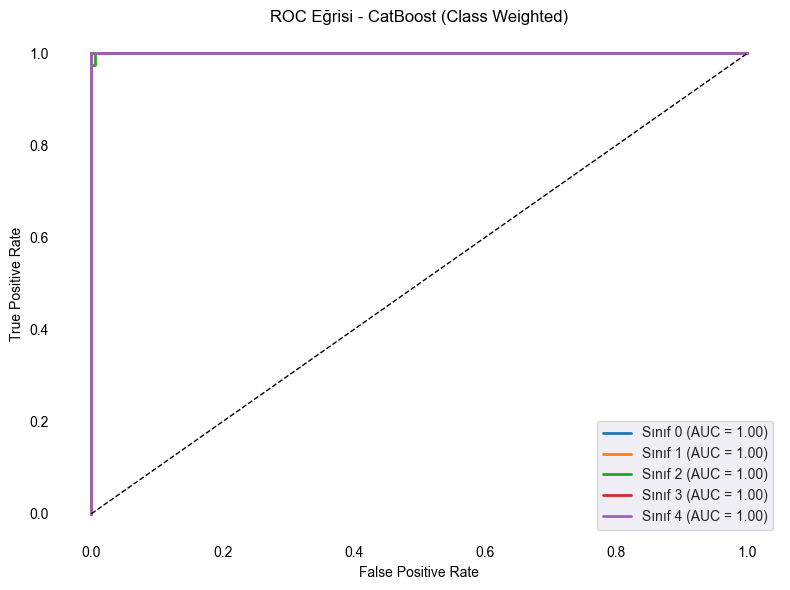

In [196]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Modeli eğit (sessiz modda)
cat_model = CatBoostClassifier(verbose=0,
        depth=2,
        learning_rate=0.03,
        l2_leaf_reg=100,
        bootstrap_type='MVS',
        subsample=0.4,
        iterations=200,
        early_stopping_rounds=50,
        random_state=42,
        rsm=0.6)
cat_model.fit(X_train, y_train)

# Tahminler
y_pred = cat_model.predict(X_test)
y_score = cat_model.predict_proba(X_test)

# Accuracy ve classification report
acc = accuracy_score(y_test, y_pred)
print(f"✅ CatBoost Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC çizimi
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Eğrisi - CatBoost", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("figures/roc_catboost.png", dpi=300, facecolor='white')
plt.show()


C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


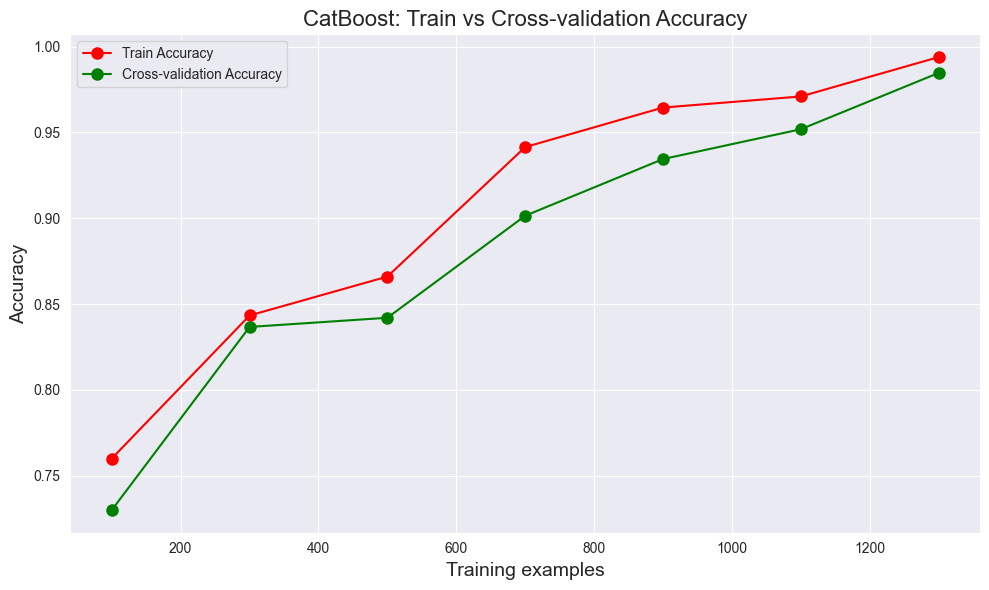

In [195]:
train_sizes = [100, 300, 500, 700, 900, 1100, 1300]
train_accuracies = []
cv_accuracies = []

for size in train_sizes:
    X_subset = X_train[:size]
    y_subset = y_train[:size]

    model = CatBoostClassifier(
        verbose=0,
        depth=2,
        learning_rate=0.03,
        l2_leaf_reg=100,
        bootstrap_type='MVS',
        subsample=0.4,
        iterations=200,
        early_stopping_rounds=50,
        random_state=42,
        rsm=0.6
    )
    model.fit(X_subset, y_subset)

    train_accuracies.append(model.score(X_subset, y_subset))
    cv_accuracies.append(cross_val_score(model, X_subset, y_subset, cv=5).mean())

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, 'ro-', label='Train Accuracy', markersize=8)
plt.plot(train_sizes, cv_accuracies, 'go-', label='Cross-validation Accuracy', markersize=8)
plt.xlabel("Training examples", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("CatBoost: Train vs Cross-validation Accuracy", fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/train_vs_cv_catboost.png", dpi=300)
plt.show()

✅ MLPClassifier Accuracy: 0.8120

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       230
           1       0.68      0.83      0.75        92
           2       0.46      0.41      0.43        39
           3       0.33      0.05      0.09        20
           4       0.76      0.72      0.74        18

    accuracy                           0.81       399
   macro avg       0.63      0.59      0.59       399
weighted avg       0.79      0.81      0.80       399



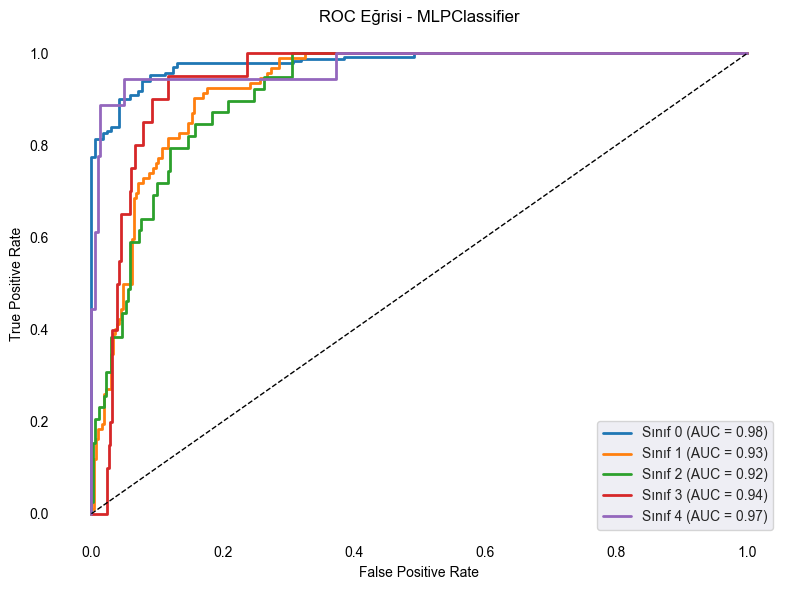

In [177]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Modeli oluştur ve eğit
mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=1000, validation_fraction=0.2, alpha=0.2, early_stopping=True, random_state=42)
mlp_model.fit(X_train, y_train)

# Tahminler
y_pred = mlp_model.predict(X_test)
y_score = mlp_model.predict_proba(X_test)

# Accuracy ve classification report
acc = accuracy_score(y_test, y_pred)
print(f"✅ MLPClassifier Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC çizimi
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Eğrisi - MLPClassifier", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("figures/roc_mlpclassifier.png", dpi=300, facecolor='white')
plt.show()


C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


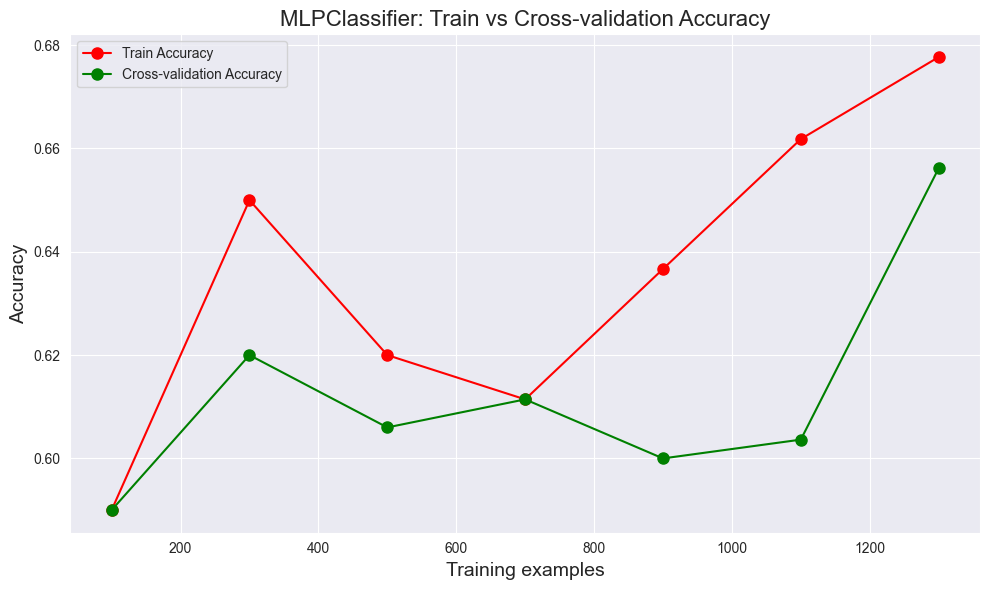

In [175]:
# Define training sizes
train_sizes = [100, 300, 500, 700, 900, 1100, 1300]
train_accuracies = []
cv_accuracies = []

for size in train_sizes:
    X_subset = X_train[:size]
    y_subset = y_train[:size]

    model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=1000, validation_fraction=0.2, alpha=0.2, early_stopping=True, random_state=42)
    model.fit(X_subset, y_subset)

    train_acc = model.score(X_subset, y_subset)
    cv_acc = cross_val_score(model, X_subset, y_subset, cv=5).mean()

    train_accuracies.append(train_acc)
    cv_accuracies.append(cv_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, 'ro-', label='Train Accuracy', markersize=8)
plt.plot(train_sizes, cv_accuracies, 'go-', label='Cross-validation Accuracy', markersize=8)
plt.xlabel("Training examples", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("MLPClassifier: Train vs Cross-validation Accuracy", fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/train_vs_cv_mlpclassifier.png", dpi=300)
plt.show()

✅ Survivorship Naive Bayes Accuracy: 0.7895

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       230
           1       0.58      0.73      0.64        92
           2       0.62      0.77      0.69        39
           3       0.78      0.70      0.74        20
           4       0.88      0.83      0.86        18

    accuracy                           0.79       399
   macro avg       0.76      0.77      0.76       399
weighted avg       0.82      0.79      0.80       399



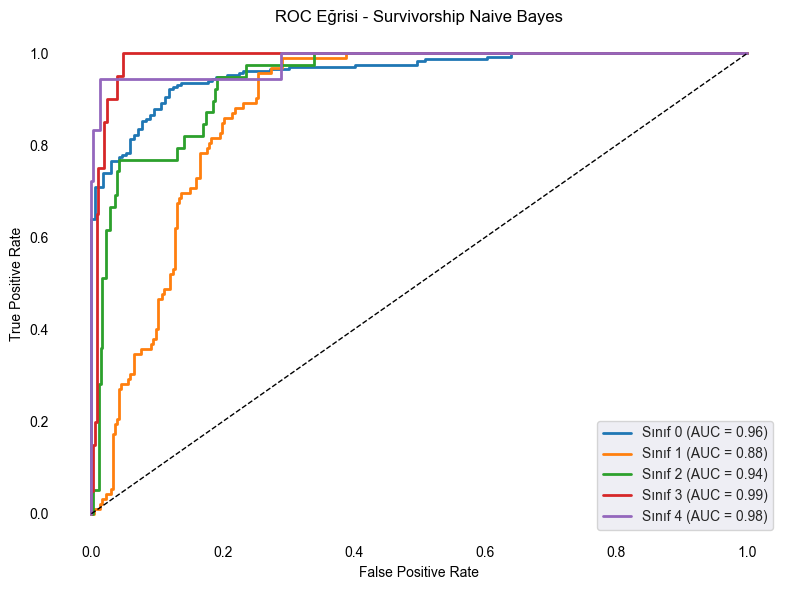

In [134]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Class priors'ı veri setindeki oranlara göre ayarla
class_counts = np.bincount(y_train)
class_priors = class_counts / class_counts.sum()

# Modeli oluştur ve eğit
nb_model = GaussianNB(priors=class_priors)
nb_model.fit(X_train, y_train)

# Tahminler
y_pred = nb_model.predict(X_test)
y_score = nb_model.predict_proba(X_test)

# Accuracy ve classification report
acc = accuracy_score(y_test, y_pred)
print(f"✅ Survivorship Naive Bayes Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC çizimi
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("ROC Eğrisi - Survivorship Naive Bayes", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("figures/roc_survivorship_naive_bayes.png", dpi=300, facecolor='white')
plt.show()


In [197]:

from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": log_model,
    "SVM": svm_model,
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
    "KNN": knn_model,
    "Naive Bayes": nb_model,
    "Gradient Boosting": gb_model,
    "CatBoost": cat_model,
    "MLPClassifier": mlp_model
}

for name, model in models.items():
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    cv_scores = cross_val_score(model, X, y, cv=5)

    print(f"📌 {name}")
    print(f"   🟩 Train Accuracy: {train_acc:.4f}")
    print(f"   🟥 Test Accuracy: {test_acc:.4f}")
    print(f"   🔄 Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}\n")


📌 Logistic Regression
   🟩 Train Accuracy: 0.7147
   🟥 Test Accuracy: 0.7393
   🔄 Cross-Validation Accuracy: 0.7106 ± 0.0106

📌 SVM
   🟩 Train Accuracy: 0.9235
   🟥 Test Accuracy: 0.9148
   🔄 Cross-Validation Accuracy: 0.9007 ± 0.0192

📌 Random Forest
   🟩 Train Accuracy: 0.8345
   🟥 Test Accuracy: 0.8296
   🔄 Cross-Validation Accuracy: 0.8235 ± 0.0115

📌 Decision Tree
   🟩 Train Accuracy: 1.0000
   🟥 Test Accuracy: 1.0000
   🔄 Cross-Validation Accuracy: 1.0000 ± 0.0000

📌 KNN
   🟩 Train Accuracy: 0.7737
   🟥 Test Accuracy: 0.7268
   🔄 Cross-Validation Accuracy: 0.7177 ± 0.0114

📌 Naive Bayes
   🟩 Train Accuracy: 0.8044
   🟥 Test Accuracy: 0.7895
   🔄 Cross-Validation Accuracy: 0.7969 ± 0.0348

📌 Gradient Boosting
   🟩 Train Accuracy: 1.0000
   🟥 Test Accuracy: 1.0000
   🔄 Cross-Validation Accuracy: 0.9995 ± 0.0010

📌 CatBoost
   🟩 Train Accuracy: 0.9962
   🟥 Test Accuracy: 0.9900
   🔄 Cross-Validation Accuracy: 0.9925 ± 0.0036

📌 MLPClassifier
   🟩 Train Accuracy: 0.7962
   🟥 Test Acc

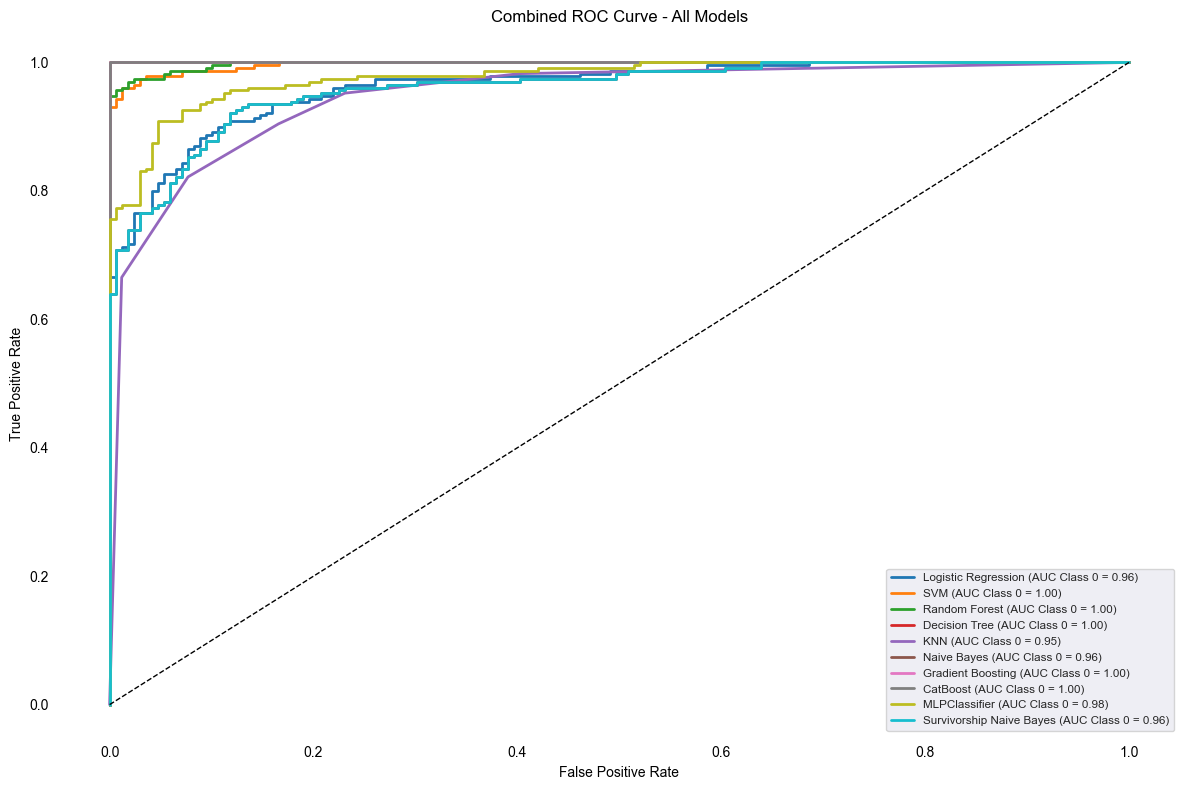

Model  Mean AUC
6         Gradient Boosting    1.0000
3             Decision Tree    1.0000
7                  CatBoost    1.0000
1                       SVM    0.9939
9  Survivorship Naive Bayes    0.9501
5               Naive Bayes    0.9501
8             MLPClassifier    0.9394
2             Random Forest    0.9367
0       Logistic Regression    0.9226
4                       KNN    0.8604

In [136]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize target for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

models = {
    "Logistic Regression": log_model,
    "SVM": svm_model,
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
    "KNN": knn_model,
    "Naive Bayes": nb_model,
    "Gradient Boosting": gb_model,
    "CatBoost": cat_model,
    "MLPClassifier": mlp_model,
    "Survivorship Naive Bayes": nb_model  # Assuming the same model is reused for both variants
}

auc_summary = {}

plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        continue  # Skip models without probability/score support

    mean_auc = 0
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        mean_auc += roc_auc
        if i == 0:
            plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC Class 0 = {roc_auc:.2f})")
    mean_auc /= n_classes
    auc_summary[name] = round(mean_auc, 4)

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("Combined ROC Curve - All Models", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right", fontsize="small")
plt.tight_layout()
plt.show()

# Display AUC summary
import pandas as pd
auc_df = pd.DataFrame(list(auc_summary.items()), columns=["Model", "Mean AUC"]).sort_values(by="Mean AUC", ascending=False)
display(auc_df)


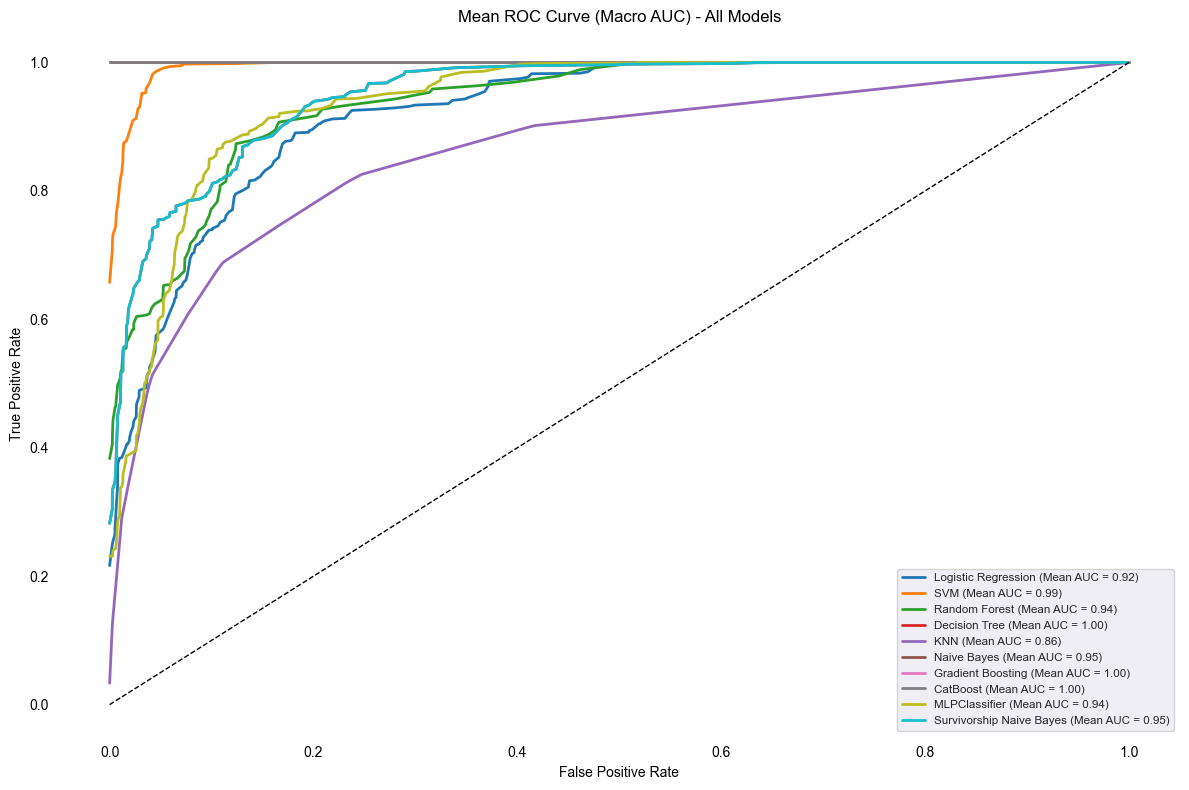

Model  Macro AUC
6         Gradient Boosting     1.0000
3             Decision Tree     1.0000
7                  CatBoost     1.0000
1                       SVM     0.9943
9  Survivorship Naive Bayes     0.9513
5               Naive Bayes     0.9513
8             MLPClassifier     0.9406
2             Random Forest     0.9389
0       Logistic Regression     0.9238
4                       KNN     0.8604

In [137]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

# Binarize target for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

models = {
    "Logistic Regression": log_model,
    "SVM": svm_model,
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
    "KNN": knn_model,
    "Naive Bayes": nb_model,
    "Gradient Boosting": gb_model,
    "CatBoost": cat_model,
    "MLPClassifier": mlp_model,
    "Survivorship Naive Bayes": nb_model
}

mean_auc_results = {}

plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        continue

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)
    mean_auc_results[name] = round(macro_auc, 4)

    plt.plot(all_fpr, mean_tpr, lw=2, label=f"{name} (Mean AUC = {macro_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.title("Mean ROC Curve (Macro AUC) - All Models", color='black')
ax.tick_params(colors='black')
plt.legend(loc="lower right", fontsize="small")
plt.tight_layout()
plt.show()

# Display mean AUC summary
import pandas as pd
auc_df = pd.DataFrame(list(mean_auc_results.items()), columns=["Model", "Macro AUC"]).sort_values(by="Macro AUC", ascending=False)
display(auc_df)

In [138]:
from sklearn.metrics import accuracy_score, roc_auc_score

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_acc = accuracy_score(y_train, train_pred)
        test_acc = accuracy_score(y_test, test_pred)

        print(f"📌 {name}")
        print(f"   🟢 Train Accuracy: {train_acc:.4f}")
        print(f"   🔵 Test Accuracy : {test_acc:.4f}")
        print(f"   Gap             : {train_acc - test_acc:.4f}")

        if train_acc - test_acc > 0.15:
            print("   ⚠️ Potential Overfitting Detected\n")
        else:
            print("   ✅ Looks OK\n")


📌 Logistic Regression
   🟢 Train Accuracy: 0.7185
   🔵 Test Accuracy : 0.7368
   Gap             : -0.0183
   ✅ Looks OK

📌 SVM
   🟢 Train Accuracy: 0.9166
   🔵 Test Accuracy : 0.9273
   Gap             : -0.0107
   ✅ Looks OK

📌 Random Forest
   🟢 Train Accuracy: 0.8345
   🔵 Test Accuracy : 0.8296
   Gap             : 0.0049
   ✅ Looks OK

📌 Decision Tree
   🟢 Train Accuracy: 1.0000
   🔵 Test Accuracy : 1.0000
   Gap             : 0.0000
   ✅ Looks OK

📌 KNN
   🟢 Train Accuracy: 0.8125
   🔵 Test Accuracy : 0.7243
   Gap             : 0.0882
   ✅ Looks OK

📌 Naive Bayes
   🟢 Train Accuracy: 0.8044
   🔵 Test Accuracy : 0.7895
   Gap             : 0.0149
   ✅ Looks OK

📌 Gradient Boosting
   🟢 Train Accuracy: 1.0000
   🔵 Test Accuracy : 1.0000
   Gap             : 0.0000
   ✅ Looks OK

📌 CatBoost
   🟢 Train Accuracy: 1.0000
   🔵 Test Accuracy : 1.0000
   Gap             : 0.0000
   ✅ Looks OK

📌 MLPClassifier
   🟢 Train Accuracy: 0.7862
   🔵 Test Accuracy : 0.7995
   Gap             : -0

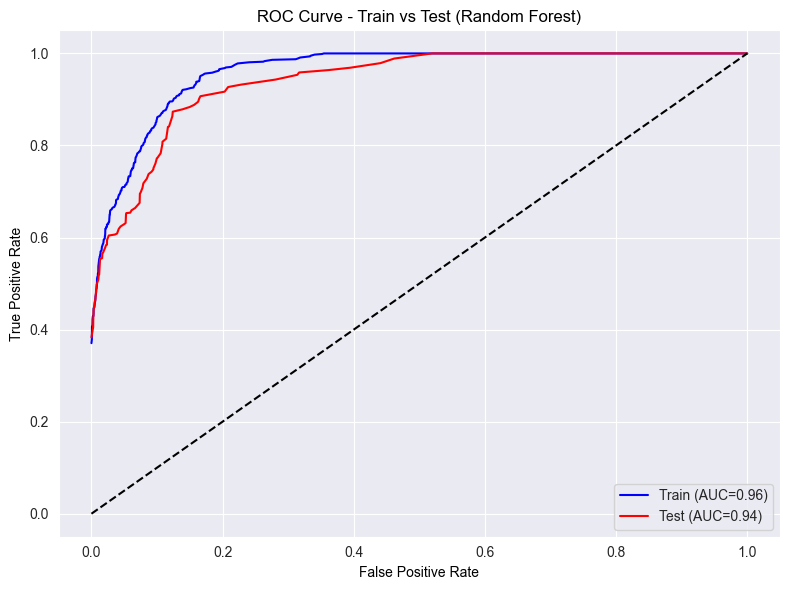

In [139]:
# Example for one model, like Random Forest
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

model = rf_model  # Replace with your model
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3, 4])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# Predict probabilities
y_train_score = model.predict_proba(X_train)
y_test_score = model.predict_proba(X_test)

# Compute macro-average ROC AUC for train
fpr_train = dict()
tpr_train = dict()
for i in range(5):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_train_score[:, i])
all_fpr_train = np.unique(np.concatenate([fpr_train[i] for i in range(5)]))
mean_tpr_train = np.mean([np.interp(all_fpr_train, fpr_train[i], tpr_train[i]) for i in range(5)], axis=0)
macro_auc_train = auc(all_fpr_train, mean_tpr_train)

# Compute macro-average ROC AUC for test
fpr_test = dict()
tpr_test = dict()
for i in range(5):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_test_score[:, i])
all_fpr_test = np.unique(np.concatenate([fpr_test[i] for i in range(5)]))
mean_tpr_test = np.mean([np.interp(all_fpr_test, fpr_test[i], tpr_test[i]) for i in range(5)], axis=0)
macro_auc_test = auc(all_fpr_test, mean_tpr_test)

# Plot both
plt.figure(figsize=(8, 6), facecolor='white')
plt.plot(all_fpr_train, mean_tpr_train, label=f"Train (AUC={macro_auc_train:.2f})", color='blue')
plt.plot(all_fpr_test, mean_tpr_test, label=f"Test (AUC={macro_auc_test:.2f})", color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Train vs Test (Random Forest)", color='black')
plt.xlabel("False Positive Rate", color='black')
plt.ylabel("True Positive Rate", color='black')
plt.legend()
plt.tight_layout()
plt.show()


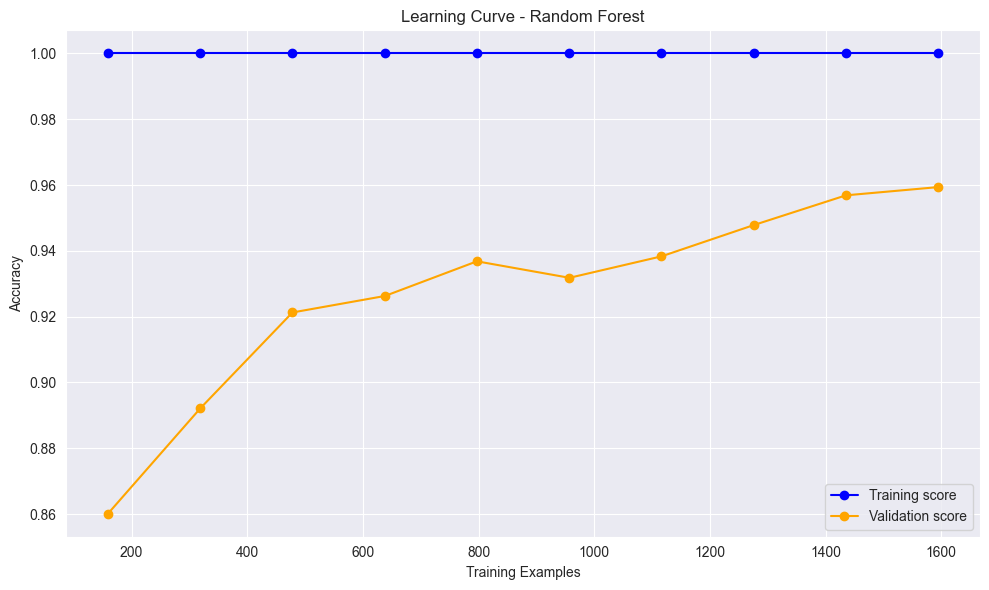

In [140]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(random_state=42),
    X, y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(train_sizes, train_mean, 'o-', label='Training score', color='blue')
plt.plot(train_sizes, test_mean, 'o-', label='Validation score', color='orange')
plt.title("Learning Curve - Random Forest")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("figures/learning_curve_rf.png", dpi=300)
plt.show()


In [141]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

print("CV Scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


CV Scores: [0.94736842 0.94736842 0.96491228 0.97744361 0.95728643]
Average CV Accuracy: 0.9588758327980755


In [142]:
rf.fit(X_train, y_train)

train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Training Accuracy: 1.0000
Test Accuracy: 0.9449


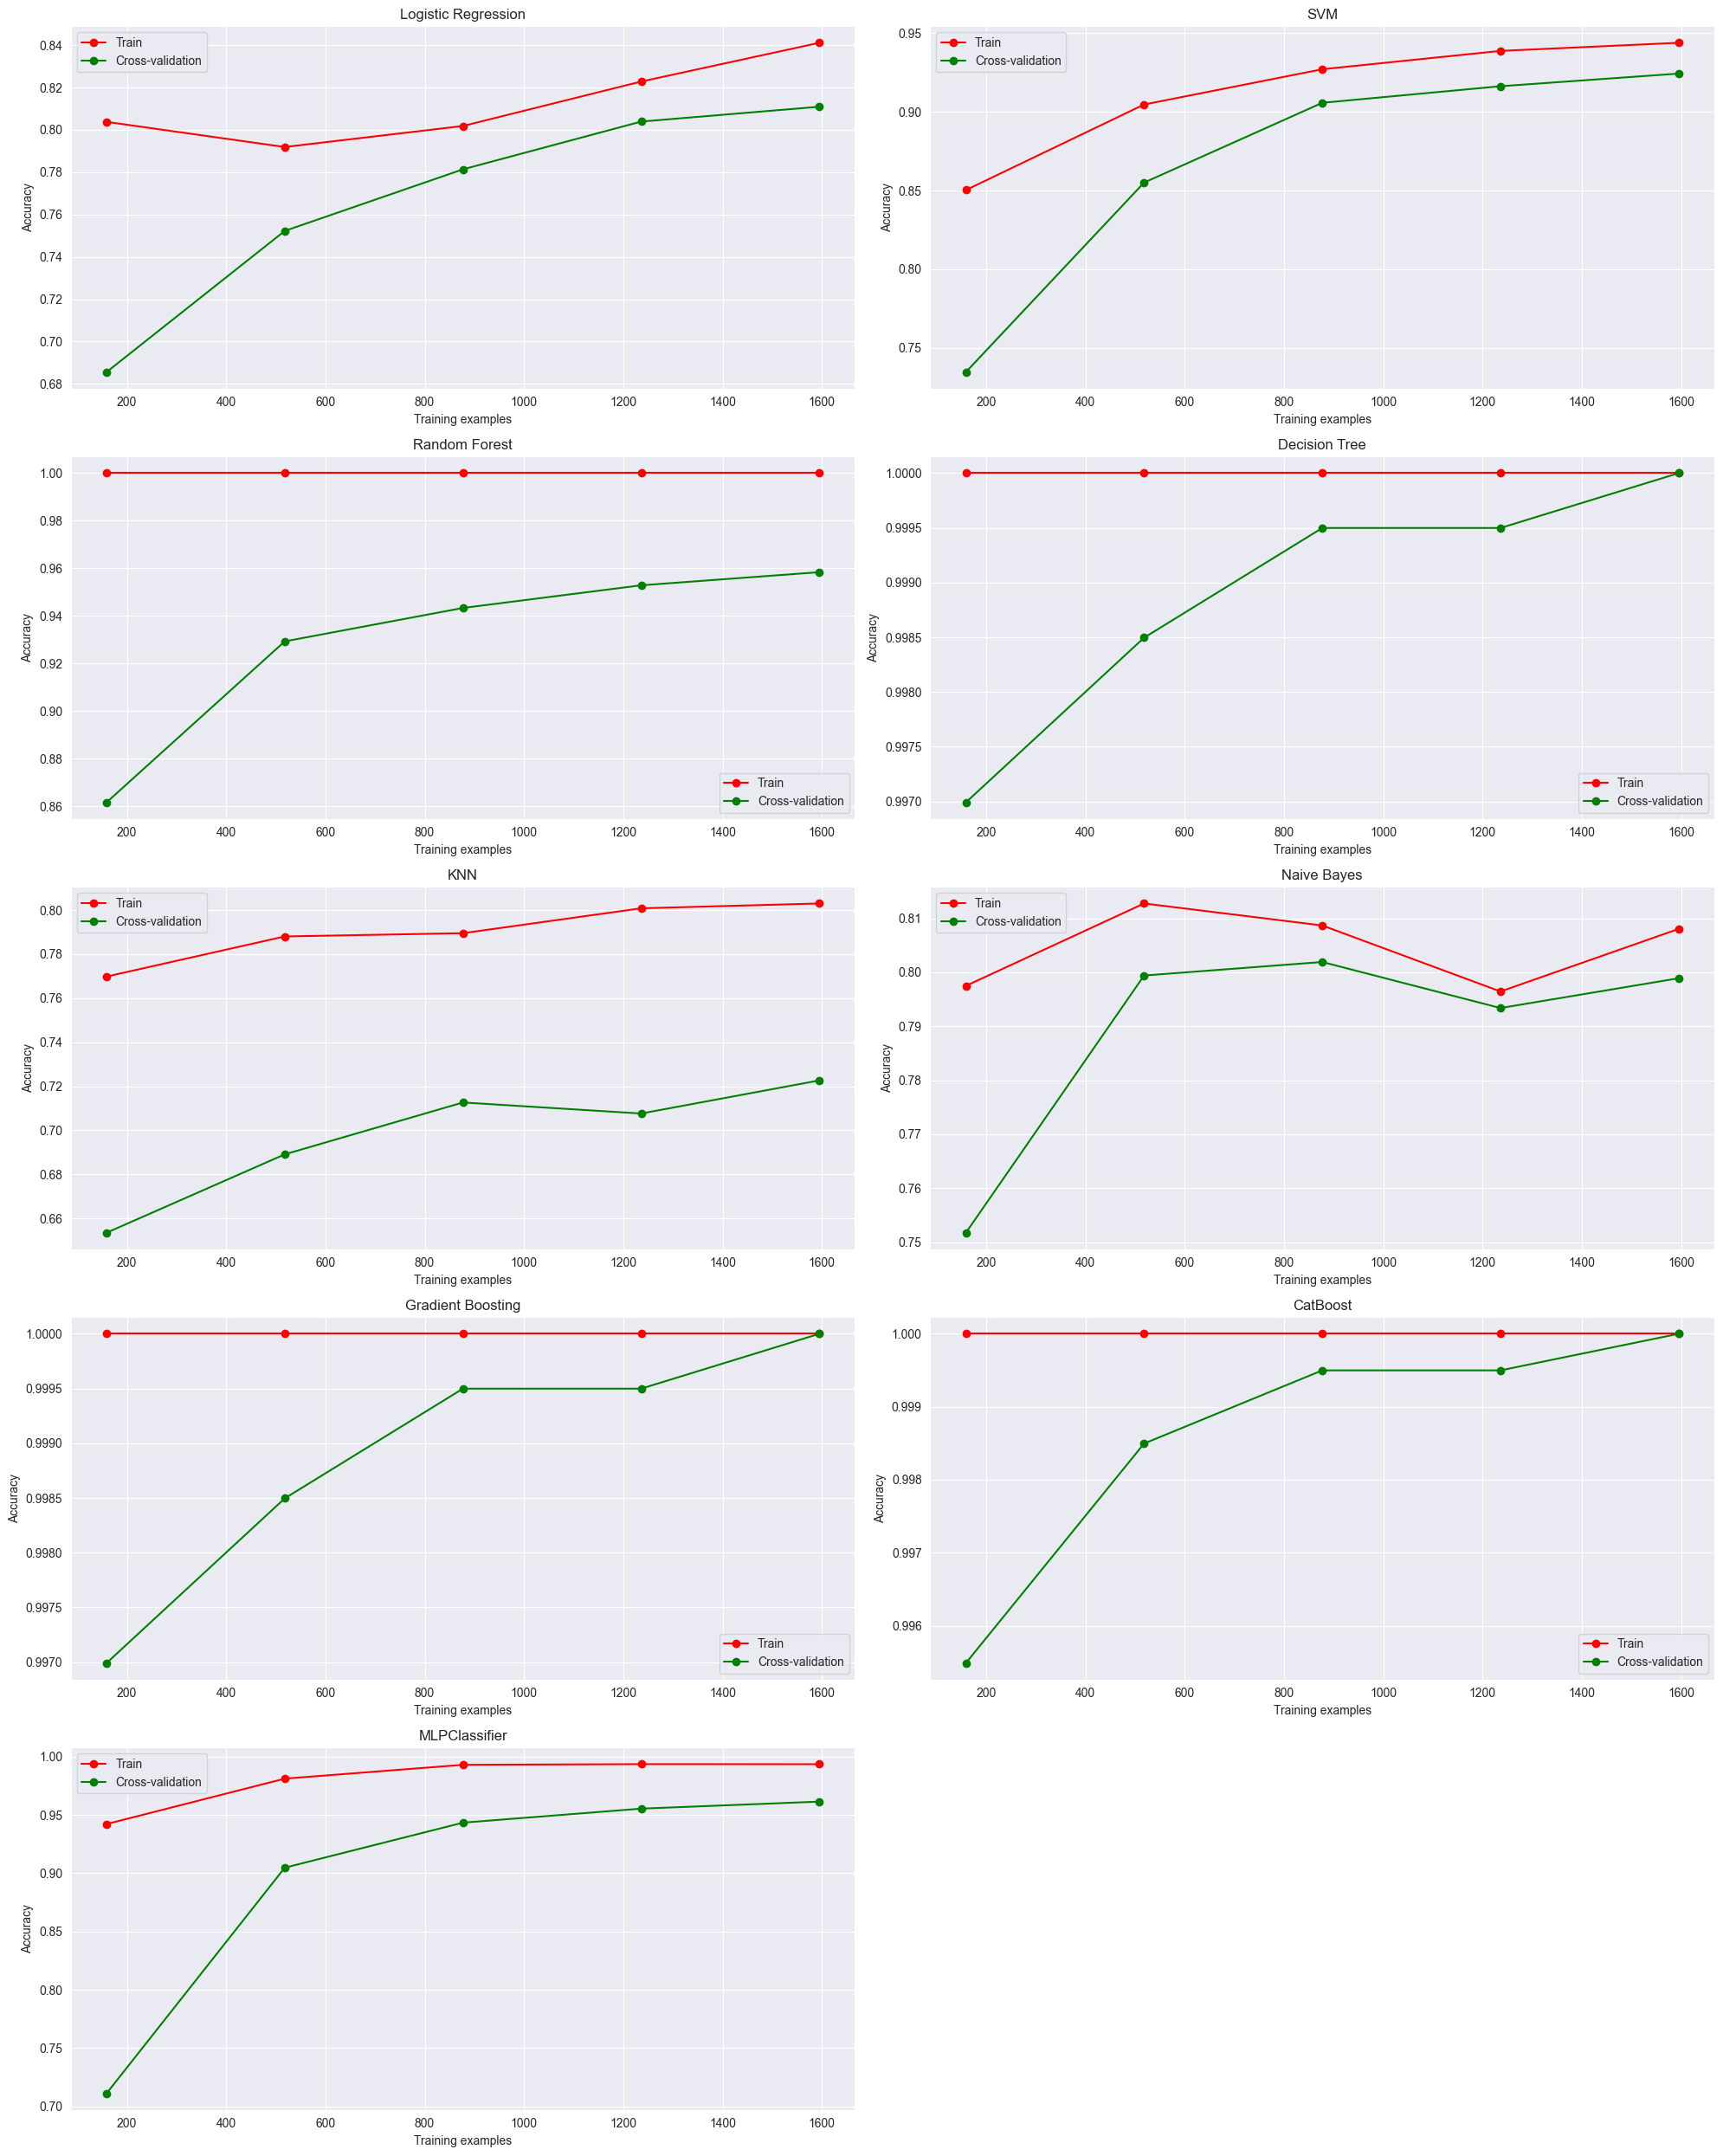

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve, StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "MLPClassifier": MLPClassifier(max_iter=500),
}

# Learning curve plotting function
def plot_learning_curve(model, title, X, y, cv, ax):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_mean, 'o-', color="r", label="Train")
    ax.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation")
    ax.set_title(title)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Accuracy")
    ax.grid(True)
    ax.legend(loc="best")

# Prepare subplots
fig, axs = plt.subplots(5, 2, figsize=(20, 25), facecolor='white')
axs = axs.ravel()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Plot for all models
for i, (name, model) in enumerate(models.items()):
    plot_learning_curve(model, name, X, y, cv, axs[i])

if len(models) < len(axs):
    for j in range(len(models), len(axs)):
        fig.delaxes(axs[j])
    
plt.tight_layout()
plt.show()


✅ Accuracy: 0.7894736842105263

📊 Classification Report:
              precision    recall  f1-score   support

           0      0.945     0.822     0.879       230
           1      0.578     0.728     0.644        92
           2      0.625     0.769     0.690        39
           3      0.778     0.700     0.737        20
           4      0.882     0.833     0.857        18

    accuracy                          0.789       399
   macro avg      0.762     0.771     0.761       399
weighted avg      0.818     0.789     0.798       399


📉 Confusion Matrix:


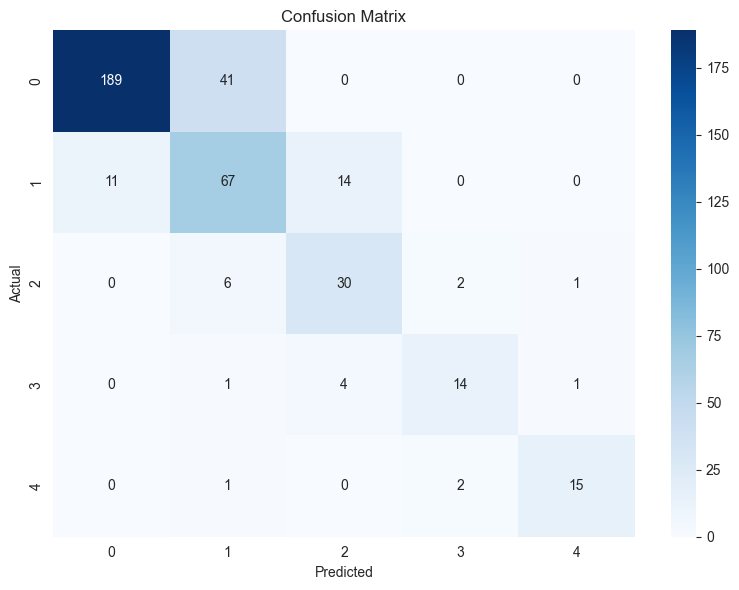

🎯 Macro ROC AUC: 0.9501


C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib

🔄 Cross-Validation Accuracy: 0.9629 ± 0.0070


C:\Users\juanr\OneDrive\Escritorio\VERI BILIMINE GIRIS\PROJE\communitiesAndCrimeProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [58]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your model is already trained, and these variables are available:
# y_test, y_pred, model, X, y

print("✅ Accuracy:", accuracy_score(y_test, y_pred))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

print("\n📉 Confusion Matrix:")
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Optional: ROC AUC (macro)
try:
    y_test_bin = label_binarize(y_test, classes=list(range(len(set(y_test)))))
    auc_score = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
    print(f"🎯 Macro ROC AUC: {auc_score:.4f}")
except Exception as e:
    print("⚠️ ROC AUC skipped:", e)

# Optional: CV Score (if model and X, y are available)
try:
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"🔄 Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
except Exception as e:
    print("⚠️ Cross-validation skipped:", e)


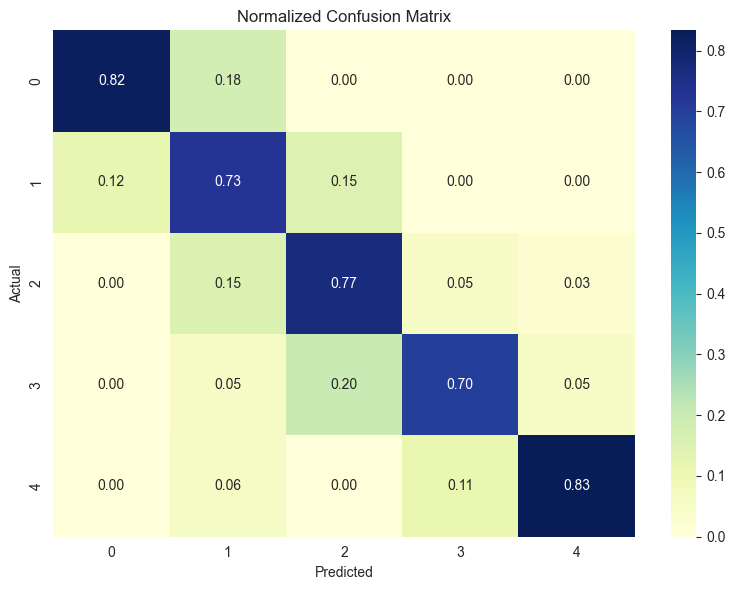

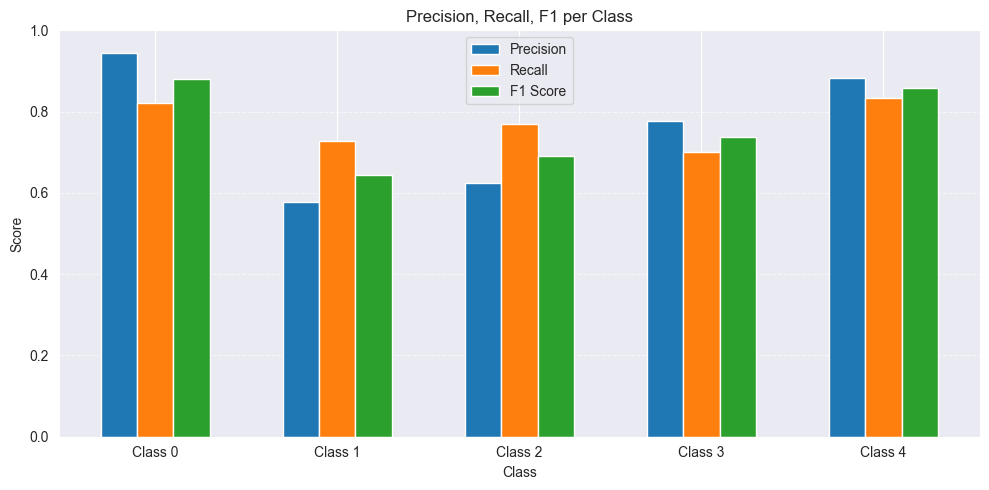

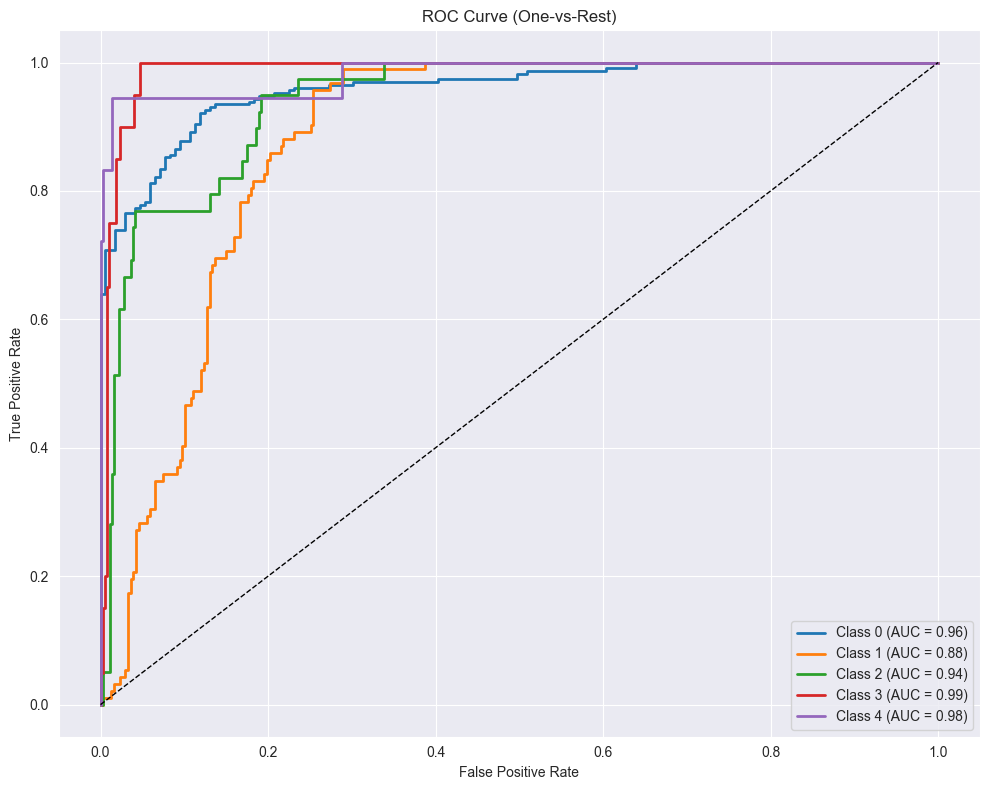

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import numpy as np

# Confusion Matrix (normalized)
plt.figure(figsize=(8, 6))
conf_norm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(conf_norm, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Bar plot: precision, recall, f1 per class
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, zero_division=0)
x = np.arange(len(precision))

plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, precision, 0.2, label='Precision')
plt.bar(x, recall, 0.2, label='Recall')
plt.bar(x + 0.2, f1, 0.2, label='F1 Score')
plt.xticks(x, [f'Class {i}' for i in range(len(precision))])
plt.title("Precision, Recall, F1 per Class")
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Optional: ROC Curve (if probabilities available)
try:
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc

    y_bin = label_binarize(y_test, classes=list(range(len(set(y_test)))))
    fpr = {}
    tpr = {}
    roc_auc = {}
    plt.figure(figsize=(10, 8))
    for i in range(y_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (One-vs-Rest)')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("⚠️ ROC Curve skipped:", str(e))
